In [108]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix

In [109]:
sys.path.append('../src')

In [110]:
from LinearSVMClassifierCV import LinearSVMClassifierCV
from SVMModelVisualizer import SVMModelVisualizer

In [111]:
X_real_1 = np.load('../data/real_movement_class_1.npy')
X_real_2 = np.load('../data/real_movement_class_2.npy')
X_imag_1 = np.load('../data/imagined_movement_class_1.npy')
X_imag_2 = np.load('../data/imagined_movement_class_2.npy')
scaler = StandardScaler()

# need to transpose the data
X_real_1 = X_real_1.T
X_real_2 = X_real_2.T
X_imag_1 = X_imag_1.T
X_imag_2 = X_imag_2.T
# concatenate the data

X_imag = np.concatenate((X_imag_1, X_imag_2), axis=0)
X_real = np.concatenate((X_real_1, X_real_2), axis=0)
y_real = np.concatenate((np.zeros(X_real_1.shape[0]), np.ones(X_real_2.shape[0])))
y_imag = np.concatenate((np.zeros(X_imag_1.shape[0]), np.ones(X_imag_2.shape[0])))
X_imag = scaler.fit_transform(X_imag)
X_real = scaler.fit_transform(X_real)

# Cross-validated Scenarios Classification

In [112]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

In [113]:
X_train_overt, X_test_overt, y_train_overt, y_test_overt = train_test_split(X_real, y_real, test_size=0.2)
X_train_imag, X_test_imag, y_train_imag, y_test_imag = train_test_split(X_imag, y_imag, test_size=0.2)

## Overt-Overt

### Linear Kernel SVM

In [114]:
svm_cv_linear_OO = LinearSVMClassifierCV(alphas=alphas, kernel='linear', verbose=True)
model, metrics, roc_info, best_alpha = svm_cv_linear_OO.train_and_evaluate_model(X_train_overt, y_train_overt, X_test_overt, y_test_overt)
print('Best alpha: ', best_alpha)

🔁 Outer CV:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Outer Fold 1: Best α = 0.001, Val Acc = 0.9500


🔁 Outer CV:  33%|███▎      | 2/6 [00:00<00:00, 13.60it/s]

✅ Outer Fold 2: Best α = 1, Val Acc = 0.9812


✅ Outer Fold 3: Best α = 10, Val Acc = 0.9563


✅ Outer Fold 4: Best α = 0.005, Val Acc = 0.9750


🔁 Outer CV:  83%|████████▎ | 5/6 [00:00<00:00, 15.59it/s]

✅ Outer Fold 5: Best α = 0.01, Val Acc = 0.9500


🔁 Outer CV: 100%|██████████| 6/6 [00:00<00:00, 16.17it/s]

✅ Outer Fold 6: Best α = 50, Val Acc = 0.9688
Best alpha:  10.169333333333332


In [115]:
# predict the test set
y_pred_overt = model.predict(X_test_overt)
y_score_overt = model.decision_function(X_test_overt)

In [116]:
print("Accuracy:", accuracy_score(y_test_overt, y_pred_overt))
print("\nClassification Report:\n", classification_report(y_test_overt, y_pred_overt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_overt, y_pred_overt))
print("\nROC AUC Score:", roc_auc_score(y_test_overt, y_score_overt))

Accuracy: 0.9791666666666666

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        27
         1.0       0.95      1.00      0.98        21

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48


Confusion Matrix:
 [[26  1]
 [ 0 21]]

ROC AUC Score: 1.0


In [117]:
visualizer = SVMModelVisualizer(
    model=model,
    X_test=X_test_overt,
    y_test=y_test_overt,
    electrode_path="../data/BCIsensor_xy.csv",
    kernel='linear'
)

In [118]:
accuracy, auc, report = visualizer.report_metrics()

Accuracy: 0.9791666666666666
ROC AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        27
         1.0       0.95      1.00      0.98        21

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



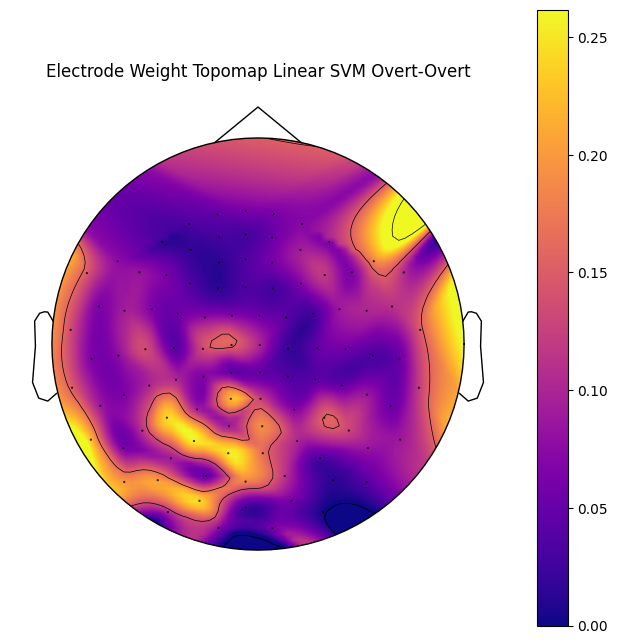

In [119]:
fig, ax, im = visualizer.plot_topomap(
    title="Electrode Weight Topomap Linear SVM Overt-Overt",
)
plt.colorbar(im, ax=ax)
plt.savefig("../figures/cross-validated-results/linear/overt-overt-topomap.png", dpi=300)
plt.show()

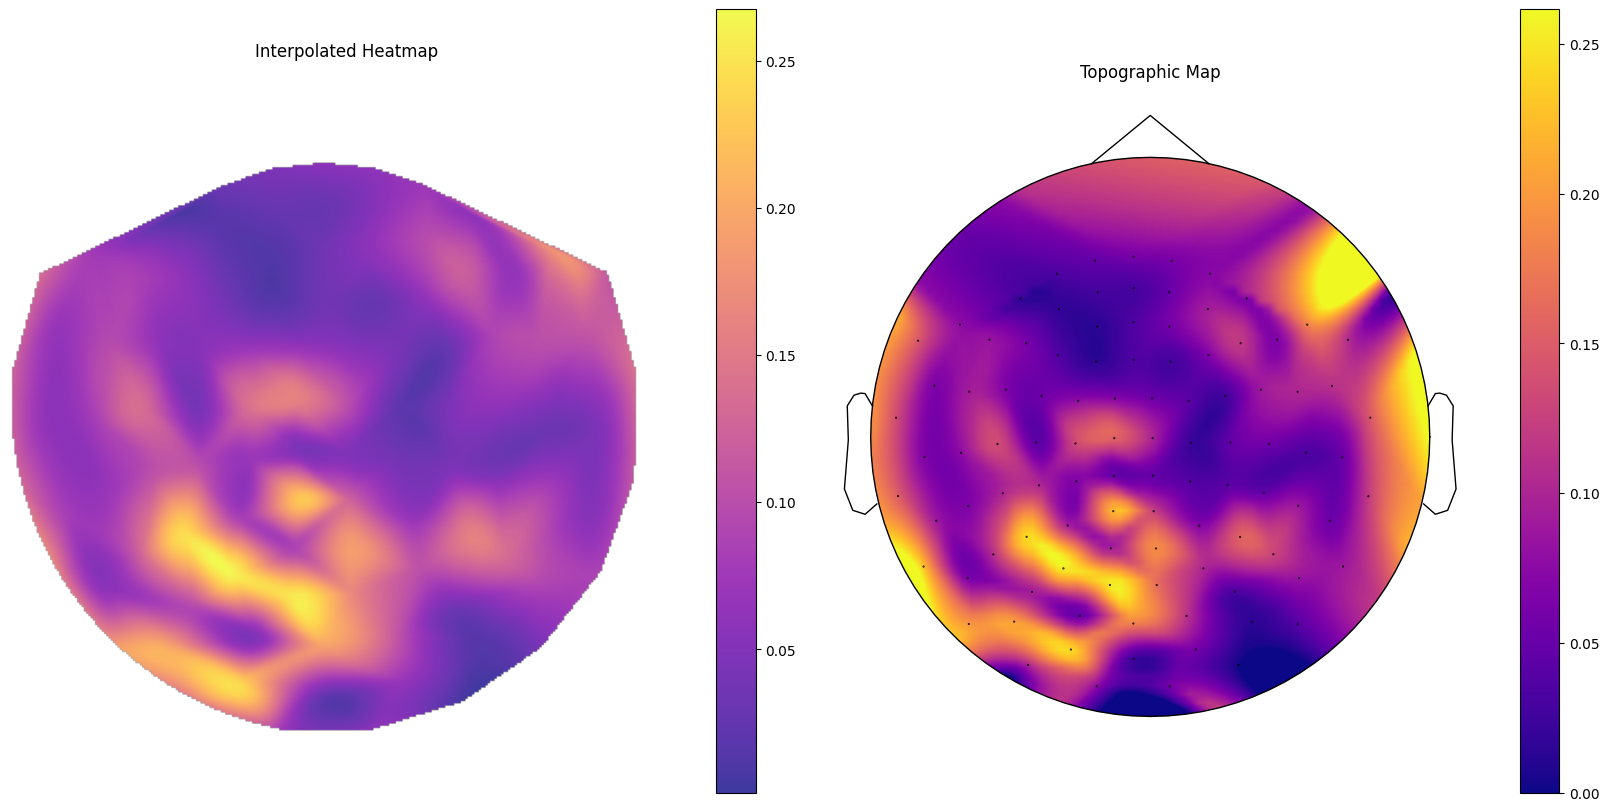

In [120]:
fig, axs, (im1, im2) = visualizer.plot_topomap_interpolated(
    titles=("Interpolated Heatmap", "Topographic Map")
)
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.savefig("../figures/cross-validated-results/linear/overt-overt-topomap_full.png", dpi=300)
plt.show()


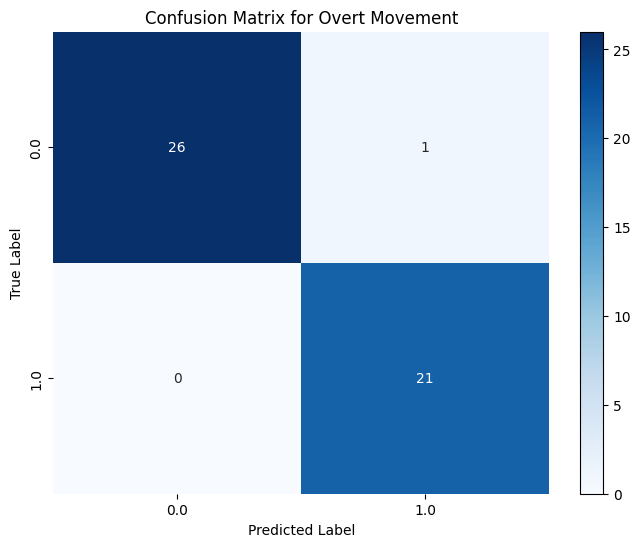

In [121]:
fig, ax = visualizer.plot_confusion_matrix(
    title="Confusion Matrix for Overt Movement",
    cmap="Blues"
)
plt.colorbar(ax.collections[0], ax=ax)
plt.savefig("../figures/cross-validated-results/linear/overt-overt-confusion-matrix.png", dpi=300)
plt.show()


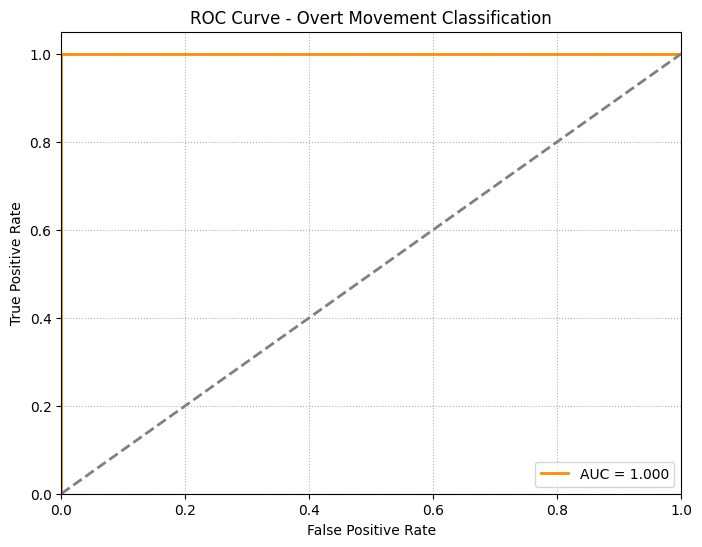

In [122]:
fig, ax = visualizer.plot_roc_curve(
    title="ROC Curve - Overt Movement Classification",
)
plt.savefig("../figures/cross-validated-results/linear/overt-overt-roc-curve.png", dpi=300)
plt.show()


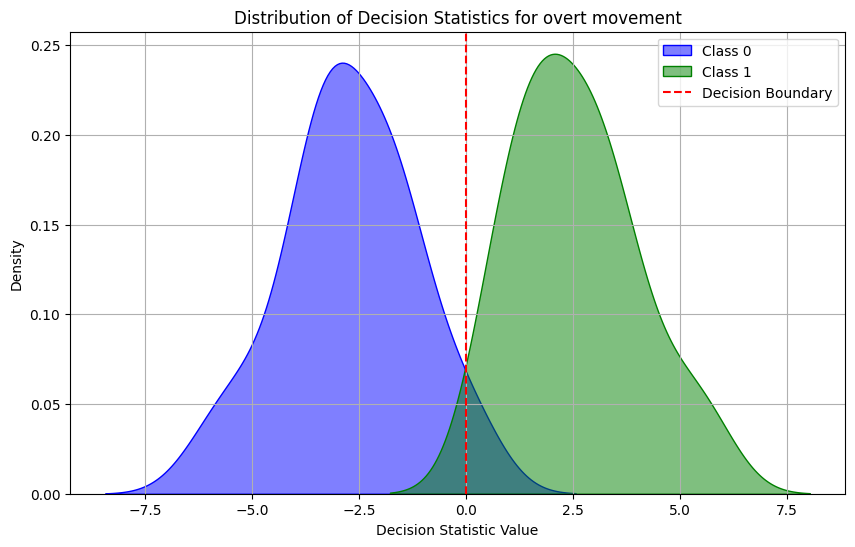

In [123]:
fig, ax = visualizer.plot_decision_statistic_kde(
    title="Distribution of Decision Statistics for overt movement",
)
plt.savefig("../figures/cross-validated-results/linear/overt-overt-decision-statistic.png", dpi=300)
plt.show()


### RBF Kernel SVM

In [124]:
svm_cv_linear_OO = LinearSVMClassifierCV(alphas=alphas, kernel='rbf', verbose=True)
model, metrics, roc_info, best_alpha = svm_cv_linear_OO.train_and_evaluate_model(X_train_overt, y_train_overt, X_test_overt, y_test_overt)
print('Best alpha: ', best_alpha)

🔁 Outer CV:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Outer Fold 1: Best α = 0.05, Val Acc = 0.9625


🔁 Outer CV:  33%|███▎      | 2/6 [00:00<00:00, 18.42it/s]

✅ Outer Fold 2: Best α = 0.005, Val Acc = 0.9437


✅ Outer Fold 3: Best α = 0.005, Val Acc = 0.9437


✅ Outer Fold 4: Best α = 0.5, Val Acc = 0.9250


🔁 Outer CV:  83%|████████▎ | 5/6 [00:00<00:00, 18.95it/s]

✅ Outer Fold 5: Best α = 0.05, Val Acc = 0.9375


🔁 Outer CV: 100%|██████████| 6/6 [00:00<00:00, 18.98it/s]

✅ Outer Fold 6: Best α = 1, Val Acc = 0.9375
Best alpha:  0.26833333333333337


In [125]:
# predict the test set
y_pred_overt = model.predict(X_test_overt)
y_score_overt = model.decision_function(X_test_overt)

In [126]:
print("Accuracy:", accuracy_score(y_test_overt, y_pred_overt))
print("\nClassification Report:\n", classification_report(y_test_overt, y_pred_overt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_overt, y_pred_overt))
print("\nROC AUC Score:", roc_auc_score(y_test_overt, y_score_overt))

Accuracy: 0.9791666666666666

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        27
         1.0       1.00      0.95      0.98        21

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48


Confusion Matrix:
 [[27  0]
 [ 1 20]]

ROC AUC Score: 1.0


In [127]:
visualizer = SVMModelVisualizer(
    model=model,
    X_test=X_test_overt,
    y_test=y_test_overt,
    electrode_path="../data/BCIsensor_xy.csv",
    kernel='rbf'
)

In [128]:
accuracy, auc, report = visualizer.report_metrics()

Accuracy: 0.9791666666666666
ROC AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        27
         1.0       1.00      0.95      0.98        21

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



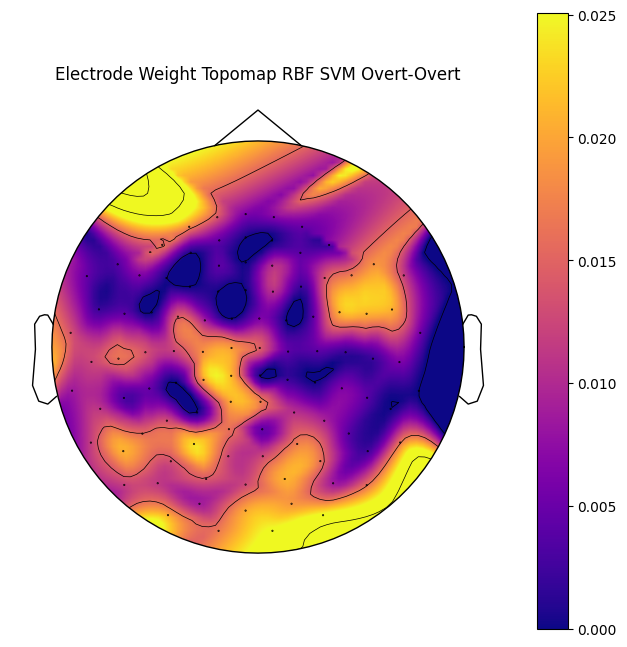

In [129]:
fig, ax, im = visualizer.plot_topomap(
    title="Electrode Weight Topomap RBF SVM Overt-Overt",
)
plt.colorbar(im, ax=ax)
plt.savefig("../figures/cross-validated-results/rbf/overt-overt-topomap.png", dpi=300)
plt.show()

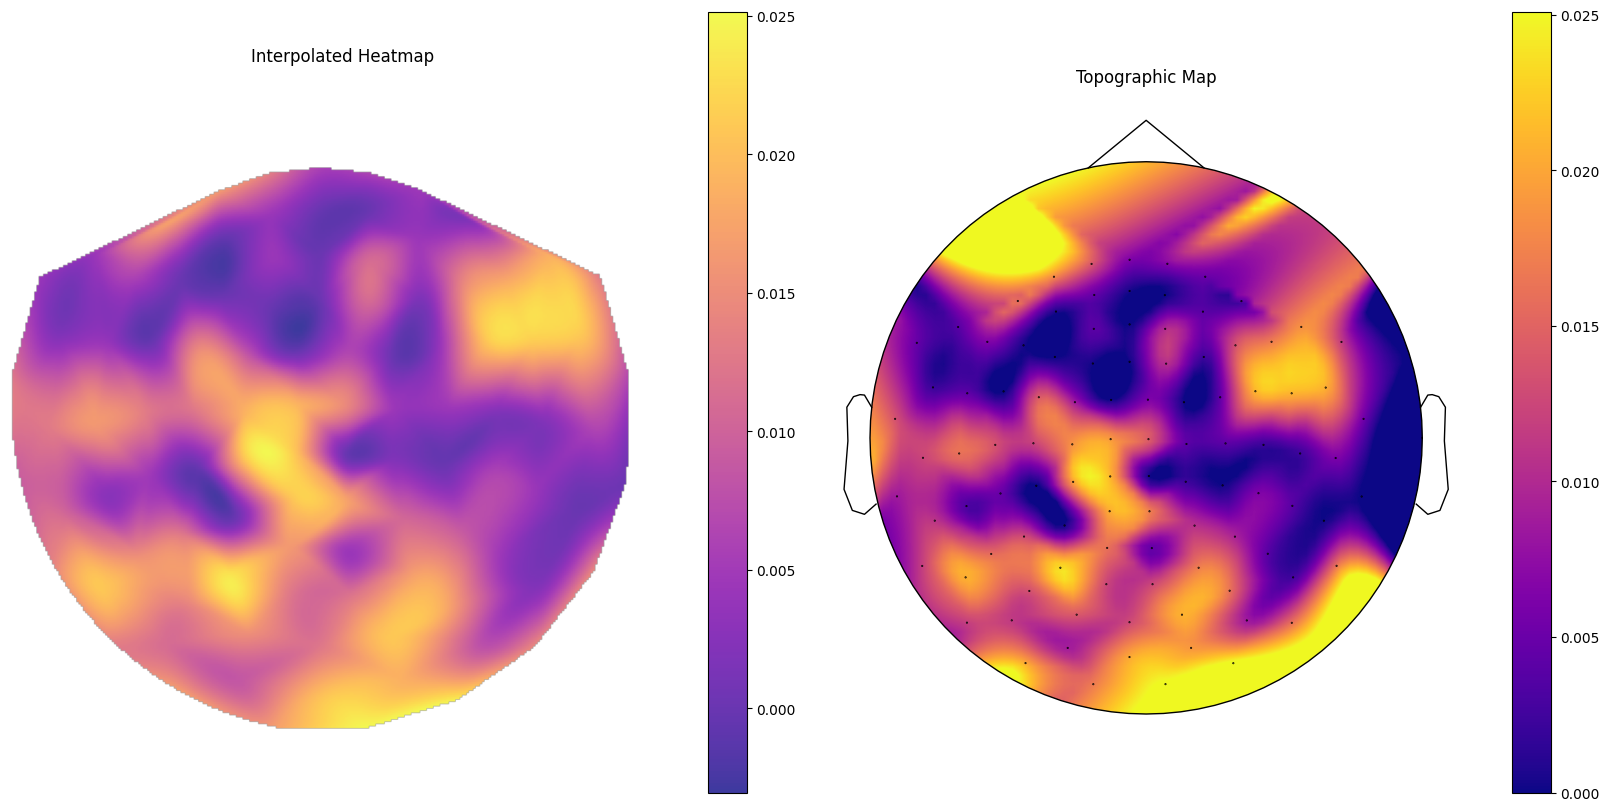

In [130]:
fig, axs, (im1, im2) = visualizer.plot_topomap_interpolated(
    titles=("Interpolated Heatmap", "Topographic Map")
)
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.savefig("../figures/cross-validated-results/rbf/overt-overt-topomap_full.png", dpi=300)
plt.show()


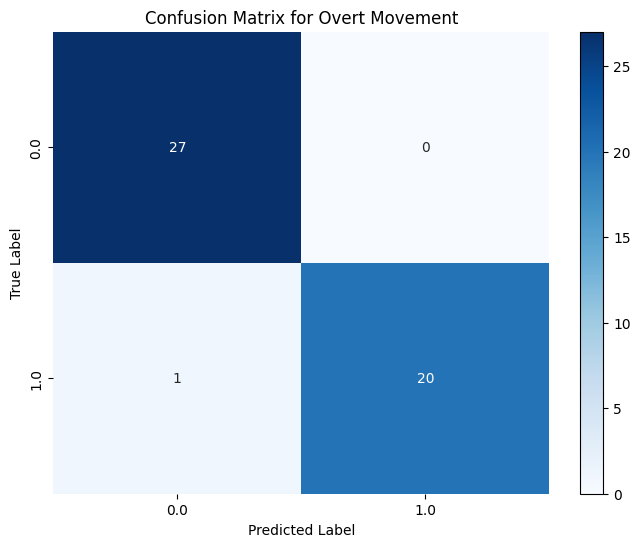

In [131]:
fig, ax = visualizer.plot_confusion_matrix(
    title="Confusion Matrix for Overt Movement",
    cmap="Blues"
)
plt.colorbar(ax.collections[0], ax=ax)
plt.savefig("../figures/cross-validated-results/rbf/overt-overt-confusion-matrix.png", dpi=300)
plt.show()


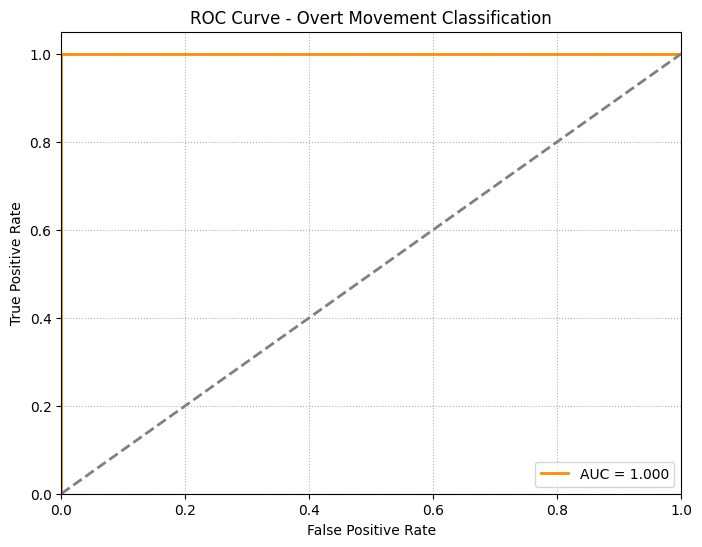

In [132]:
fig, ax = visualizer.plot_roc_curve(
    title="ROC Curve - Overt Movement Classification",
)
plt.savefig("../figures/cross-validated-results/rbf/overt-overt-roc-curve.png", dpi=300)
plt.show()


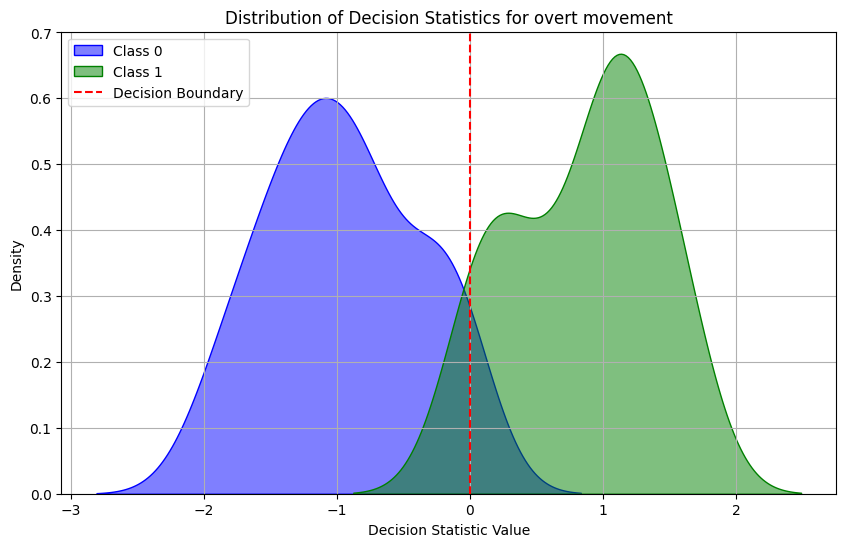

In [133]:
fig, ax = visualizer.plot_decision_statistic_kde(
    title="Distribution of Decision Statistics for overt movement",
)
plt.savefig("../figures/cross-validated-results/rbf/overt-overt-decision-statistic.png", dpi=300)
plt.show()


### Poly Kernel SVM

In [134]:
svm_cv_linear_OO = LinearSVMClassifierCV(alphas=alphas, kernel='poly', verbose=True)
model, metrics, roc_info, best_alpha = svm_cv_linear_OO.train_and_evaluate_model(X_train_overt, y_train_overt, X_test_overt, y_test_overt)
print('Best alpha: ', best_alpha)

🔁 Outer CV:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Outer Fold 1: Best α = 1, Val Acc = 0.9375


🔁 Outer CV:  33%|███▎      | 2/6 [00:00<00:00, 16.06it/s]

✅ Outer Fold 2: Best α = 0.1, Val Acc = 0.9625


✅ Outer Fold 3: Best α = 1, Val Acc = 0.9375


🔁 Outer CV:  67%|██████▋   | 4/6 [00:00<00:00, 17.74it/s]

✅ Outer Fold 4: Best α = 0.5, Val Acc = 0.9375


✅ Outer Fold 5: Best α = 0.005, Val Acc = 0.9250


🔁 Outer CV: 100%|██████████| 6/6 [00:00<00:00, 18.52it/s]

✅ Outer Fold 6: Best α = 0.05, Val Acc = 0.9062


Best alpha:  0.44249999999999995


In [135]:
# predict the test set
y_pred_overt = model.predict(X_test_overt)
y_score_overt = model.decision_function(X_test_overt)

In [136]:
print("Accuracy:", accuracy_score(y_test_overt, y_pred_overt))
print("\nClassification Report:\n", classification_report(y_test_overt, y_pred_overt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_overt, y_pred_overt))
print("\nROC AUC Score:", roc_auc_score(y_test_overt, y_score_overt))

Accuracy: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.89      0.92        27
         1.0       0.87      0.95      0.91        21

    accuracy                           0.92        48
   macro avg       0.91      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48


Confusion Matrix:
 [[24  3]
 [ 1 20]]

ROC AUC Score: 0.9664902998236331


In [137]:
visualizer = SVMModelVisualizer(
    model=model,
    X_test=X_test_overt,
    y_test=y_test_overt,
    electrode_path="../data/BCIsensor_xy.csv",
    kernel='poly'
)

In [138]:
accuracy, auc, report = visualizer.report_metrics()

Accuracy: 0.9166666666666666
ROC AUC: 0.9664902998236331

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.89      0.92        27
         1.0       0.87      0.95      0.91        21

    accuracy                           0.92        48
   macro avg       0.91      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48



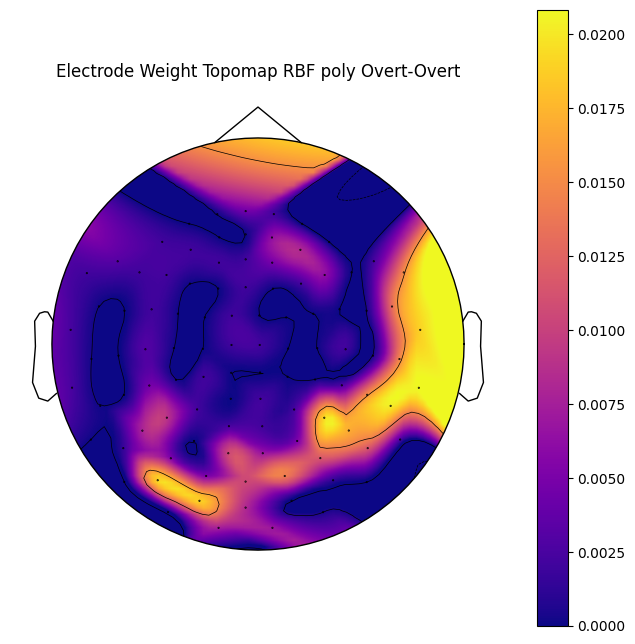

In [139]:
fig, ax, im = visualizer.plot_topomap(
    title="Electrode Weight Topomap RBF poly Overt-Overt",
)
plt.colorbar(im, ax=ax)
plt.savefig("../figures/cross-validated-results/poly/overt-overt-topomap.png", dpi=300)
plt.show()

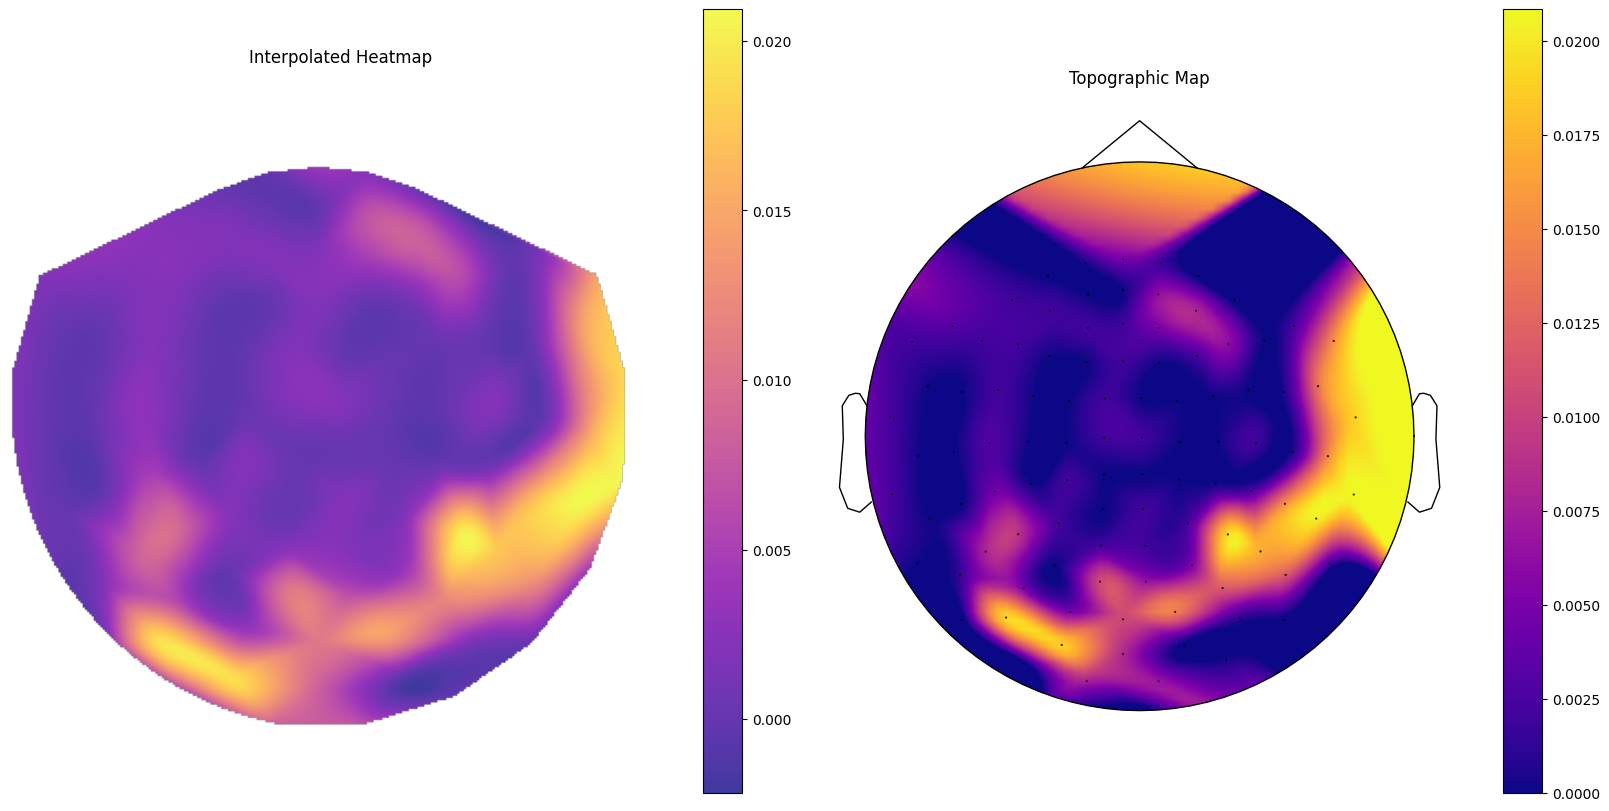

In [140]:
fig, axs, (im1, im2) = visualizer.plot_topomap_interpolated(
    titles=("Interpolated Heatmap", "Topographic Map")
)
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.savefig("../figures/cross-validated-results/poly/overt-overt-topomap_full.png", dpi=300)
plt.show()


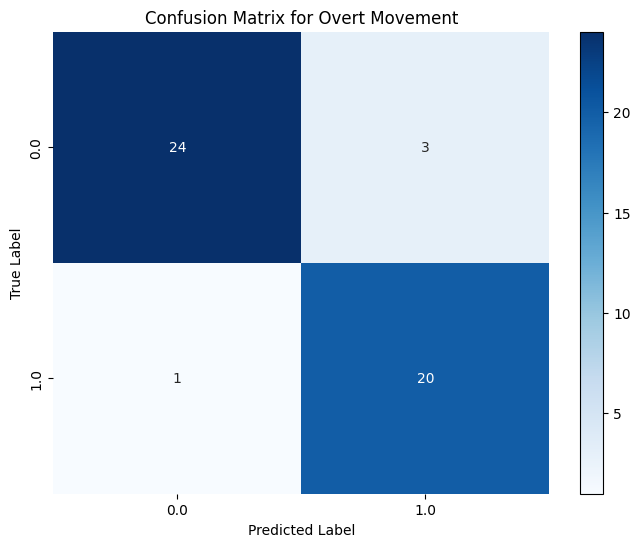

In [141]:
fig, ax = visualizer.plot_confusion_matrix(
    title="Confusion Matrix for Overt Movement",
    cmap="Blues"
)
plt.colorbar(ax.collections[0], ax=ax)
plt.savefig("../figures/cross-validated-results/poly/overt-overt-confusion-matrix.png", dpi=300)
plt.show()


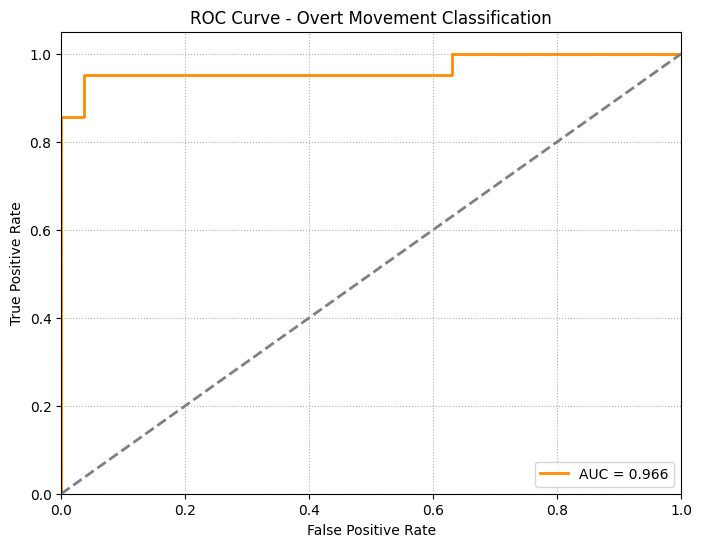

In [142]:
fig, ax = visualizer.plot_roc_curve(
    title="ROC Curve - Overt Movement Classification",
)
plt.savefig("../figures/cross-validated-results/poly/overt-overt-roc-curve.png", dpi=300)
plt.show()


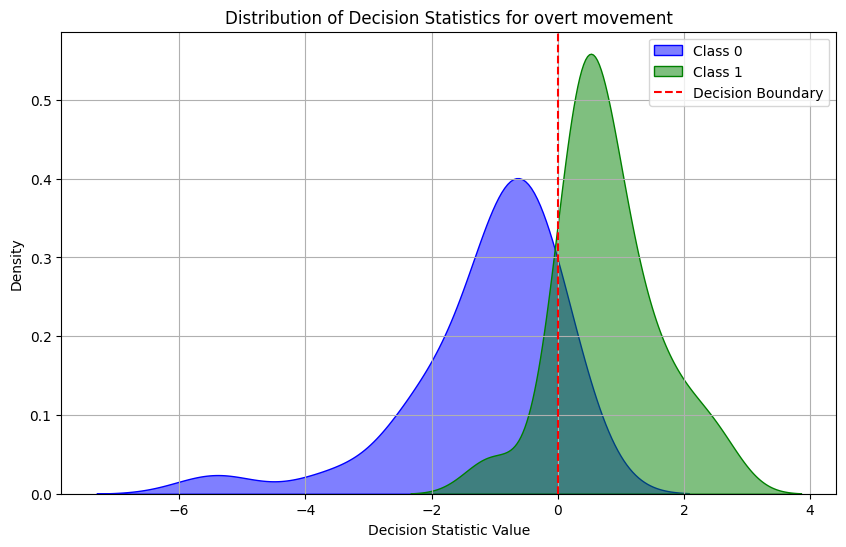

In [143]:
fig, ax = visualizer.plot_decision_statistic_kde(
    title="Distribution of Decision Statistics for overt movement",
)
plt.savefig("../figures/cross-validated-results/poly/overt-overt-decision-statistic.png", dpi=300)
plt.show()


### Sigmoid Kernel SVM

In [144]:
svm_cv_linear_OO = LinearSVMClassifierCV(alphas=alphas, kernel='sigmoid', verbose=True)
model, metrics, roc_info, best_alpha = svm_cv_linear_OO.train_and_evaluate_model(X_train_overt, y_train_overt, X_test_overt, y_test_overt)
print('Best alpha: ', best_alpha)

🔁 Outer CV:  17%|█▋        | 1/6 [00:00<00:00,  5.28it/s]

✅ Outer Fold 1: Best α = 1, Val Acc = 0.9250


✅ Outer Fold 2: Best α = 1, Val Acc = 0.9313


✅ Outer Fold 3: Best α = 0.5, Val Acc = 0.9375


🔁 Outer CV:  67%|██████▋   | 4/6 [00:00<00:00, 14.03it/s]

✅ Outer Fold 4: Best α = 1, Val Acc = 0.9313


✅ Outer Fold 5: Best α = 0.5, Val Acc = 0.9250


🔁 Outer CV: 100%|██████████| 6/6 [00:00<00:00, 14.00it/s]

✅ Outer Fold 6: Best α = 1, Val Acc = 0.9250


Best alpha:  0.8333333333333334


In [145]:
# predict the test set
y_pred_overt = model.predict(X_test_overt)
y_score_overt = model.decision_function(X_test_overt)

In [146]:
print("Accuracy:", accuracy_score(y_test_overt, y_pred_overt))
print("\nClassification Report:\n", classification_report(y_test_overt, y_pred_overt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_overt, y_pred_overt))
print("\nROC AUC Score:", roc_auc_score(y_test_overt, y_score_overt))

Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        27
         1.0       0.91      1.00      0.95        21

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48


Confusion Matrix:
 [[25  2]
 [ 0 21]]

ROC AUC Score: 0.9929453262786596


In [147]:
visualizer = SVMModelVisualizer(
    model=model,
    X_test=X_test_overt,
    y_test=y_test_overt,
    electrode_path="../data/BCIsensor_xy.csv",
    kernel='sigmoid'
)

In [148]:
accuracy, auc, report = visualizer.report_metrics()

Accuracy: 0.9583333333333334
ROC AUC: 0.9929453262786596

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        27
         1.0       0.91      1.00      0.95        21

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



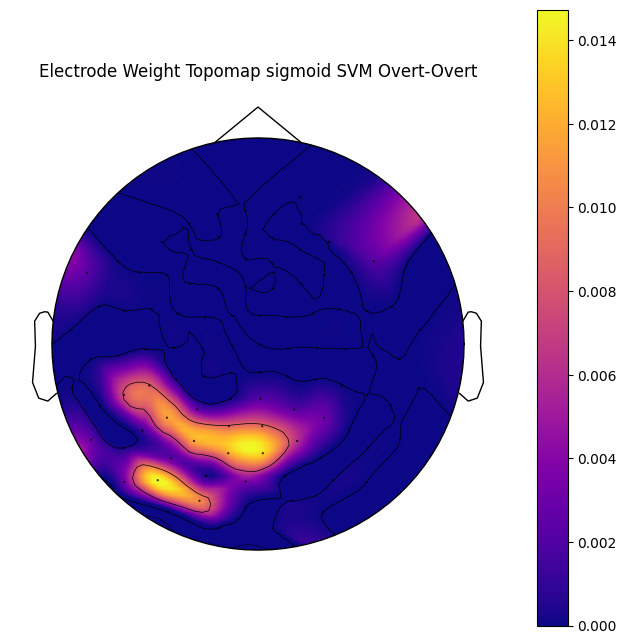

In [149]:
fig, ax, im = visualizer.plot_topomap(
    title="Electrode Weight Topomap sigmoid SVM Overt-Overt",
)
plt.colorbar(im, ax=ax)
plt.savefig("../figures/cross-validated-results/sigmoid/overt-overt-topomap.png", dpi=300)
plt.show()

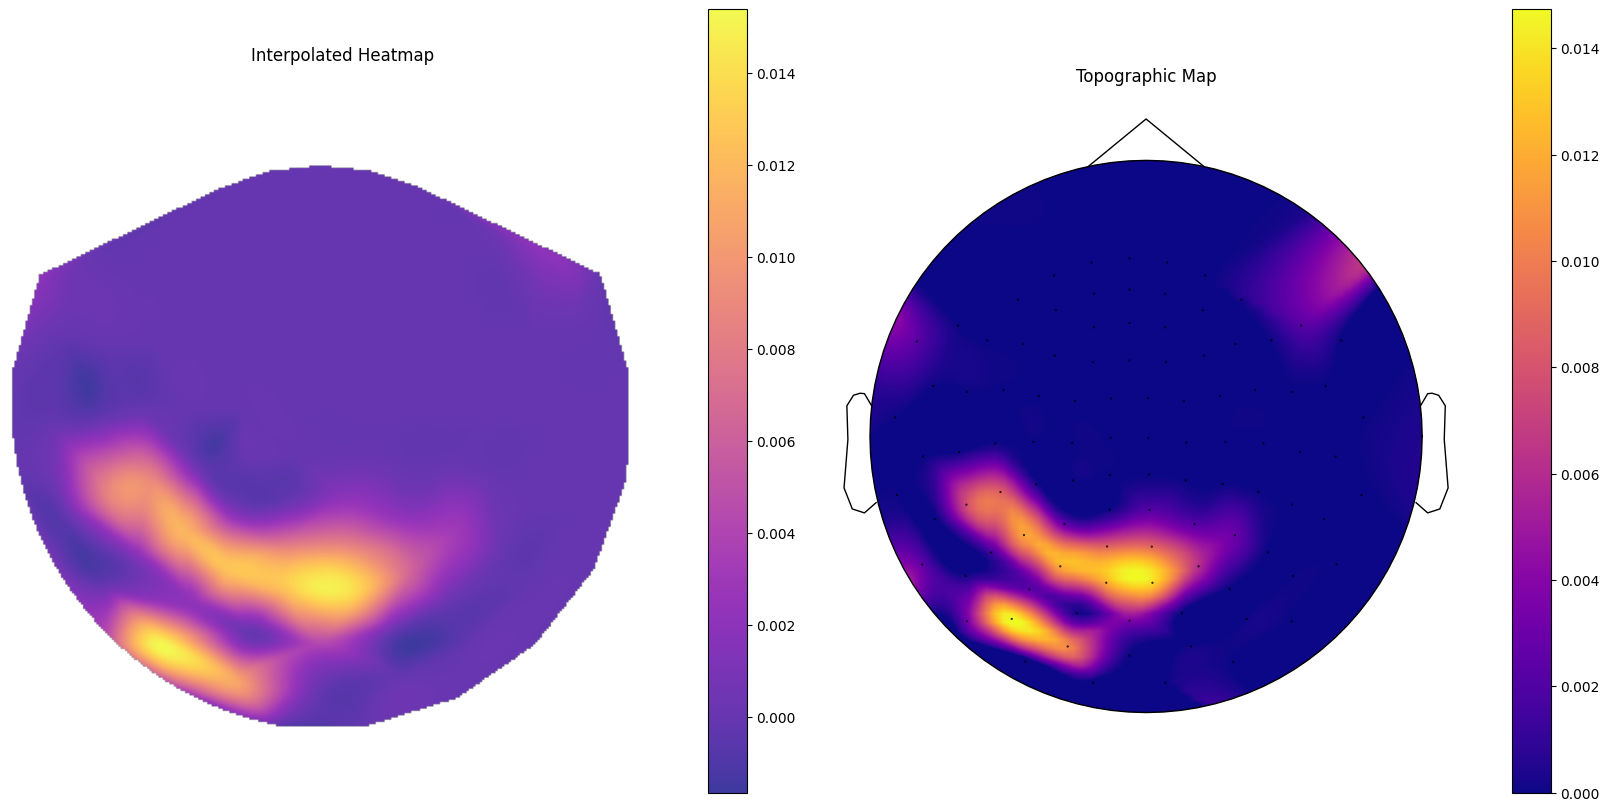

In [150]:
fig, axs, (im1, im2) = visualizer.plot_topomap_interpolated(
    titles=("Interpolated Heatmap", "Topographic Map")
)
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.savefig("../figures/cross-validated-results/sigmoid/overt-overt-topomap_full.png", dpi=300)
plt.show()


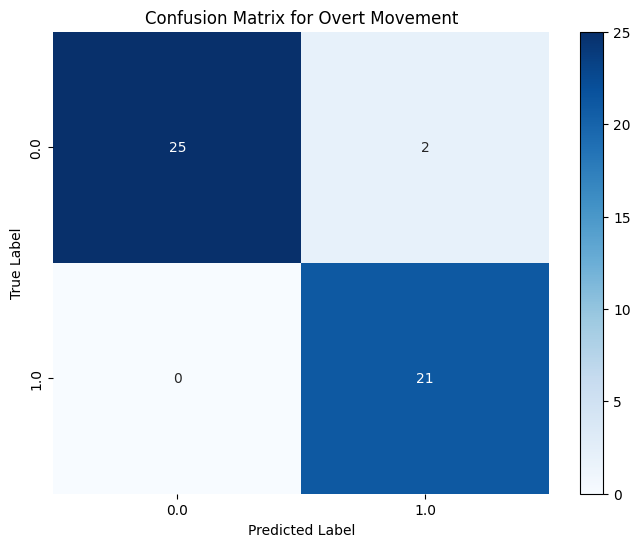

In [151]:
fig, ax = visualizer.plot_confusion_matrix(
    title="Confusion Matrix for Overt Movement",
    cmap="Blues"
)
plt.colorbar(ax.collections[0], ax=ax)
plt.savefig("../figures/cross-validated-results/sigmoid/overt-overt-confusion-matrix.png", dpi=300)
plt.show()


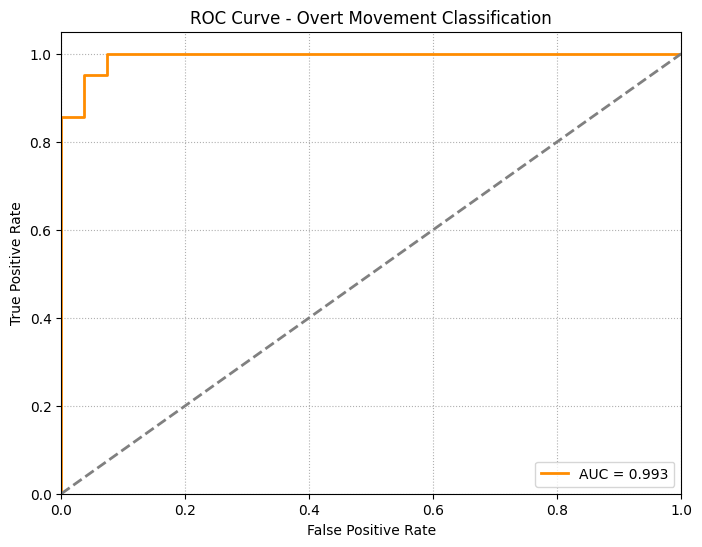

In [152]:
fig, ax = visualizer.plot_roc_curve(
    title="ROC Curve - Overt Movement Classification",
)
plt.savefig("../figures/cross-validated-results/sigmoid/overt-overt-roc-curve.png", dpi=300)
plt.show()


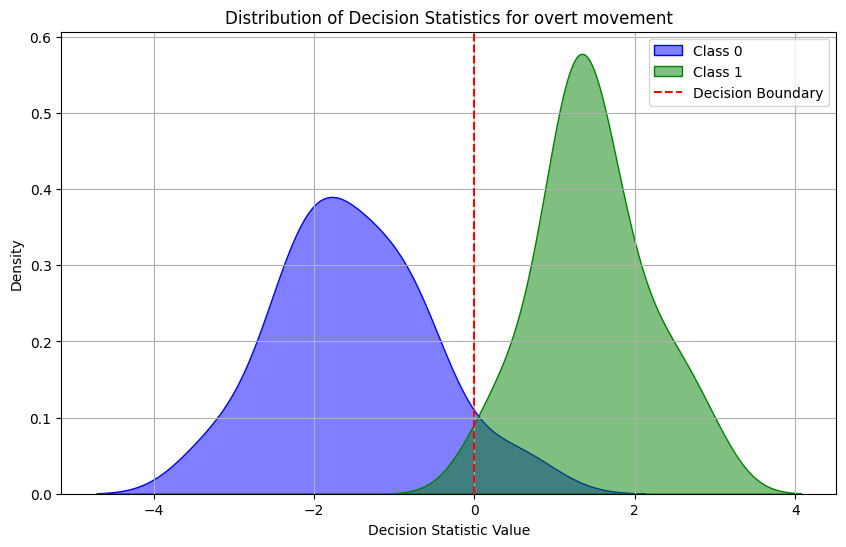

In [153]:
fig, ax = visualizer.plot_decision_statistic_kde(
    title="Distribution of Decision Statistics for overt movement",
)
plt.savefig("../figures/cross-validated-results/sigmoid/overt-overt-decision-statistic.png", dpi=300)
plt.show()


## Imagined-Imagined

### Linear Kernel SVM

In [154]:
svm_cv_linear_II = LinearSVMClassifierCV(alphas=alphas, kernel='linear', verbose=True)
model, metrics, roc_info, best_alpha = svm_cv_linear_II.train_and_evaluate_model(X_train_imag, y_train_imag, X_test_imag, y_test_imag)
print('Best alpha: ', best_alpha)

🔁 Outer CV:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Outer Fold 1: Best α = 50, Val Acc = 0.8688


✅ Outer Fold 2: Best α = 100, Val Acc = 0.8812


🔁 Outer CV:  50%|█████     | 3/6 [00:00<00:00, 24.16it/s]

✅ Outer Fold 3: Best α = 100, Val Acc = 0.8875


✅ Outer Fold 4: Best α = 10, Val Acc = 0.9125


✅ Outer Fold 5: Best α = 0.05, Val Acc = 0.8938


🔁 Outer CV: 100%|██████████| 6/6 [00:00<00:00, 12.80it/s]

✅ Outer Fold 6: Best α = 0.1, Val Acc = 0.9062
Best alpha:  43.35833333333334


In [155]:
# predict the test set
y_pred_overt = model.predict(X_test_overt)
y_score_overt = model.decision_function(X_test_overt)

In [156]:
print("Accuracy:", accuracy_score(y_test_overt, y_pred_overt))
print("\nClassification Report:\n", classification_report(y_test_overt, y_pred_overt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_overt, y_pred_overt))
print("\nROC AUC Score:", roc_auc_score(y_test_overt, y_score_overt))

Accuracy: 0.9791666666666666

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        27
         1.0       0.95      1.00      0.98        21

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48


Confusion Matrix:
 [[26  1]
 [ 0 21]]

ROC AUC Score: 0.998236331569665


In [157]:
visualizer = SVMModelVisualizer(
    model=model,
    X_test=X_test_overt,
    y_test=y_test_overt,
    electrode_path="../data/BCIsensor_xy.csv",
    kernel='linear'
)

In [158]:
accuracy, auc, report = visualizer.report_metrics()

Accuracy: 0.9791666666666666
ROC AUC: 0.998236331569665

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        27
         1.0       0.95      1.00      0.98        21

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



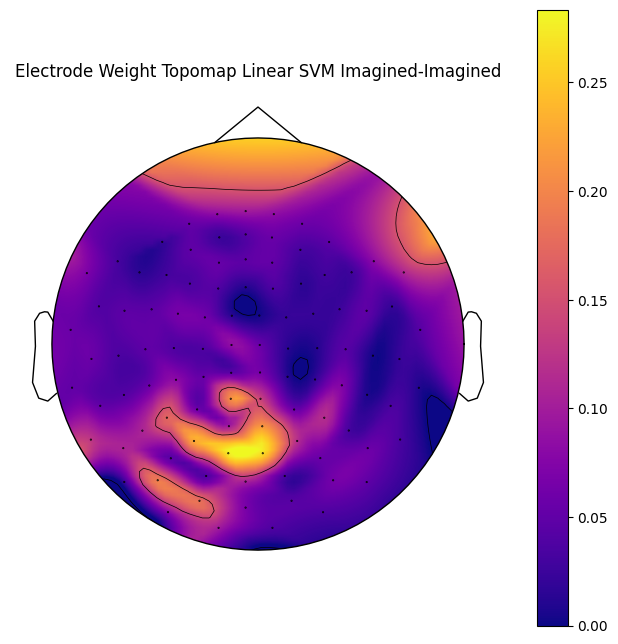

In [159]:
fig, ax, im = visualizer.plot_topomap(
    title="Electrode Weight Topomap Linear SVM Imagined-Imagined",
)
plt.colorbar(im, ax=ax)
plt.savefig("../figures/cross-validated-results/linear/imagined-imagined-topomap.png", dpi=300)
plt.show()

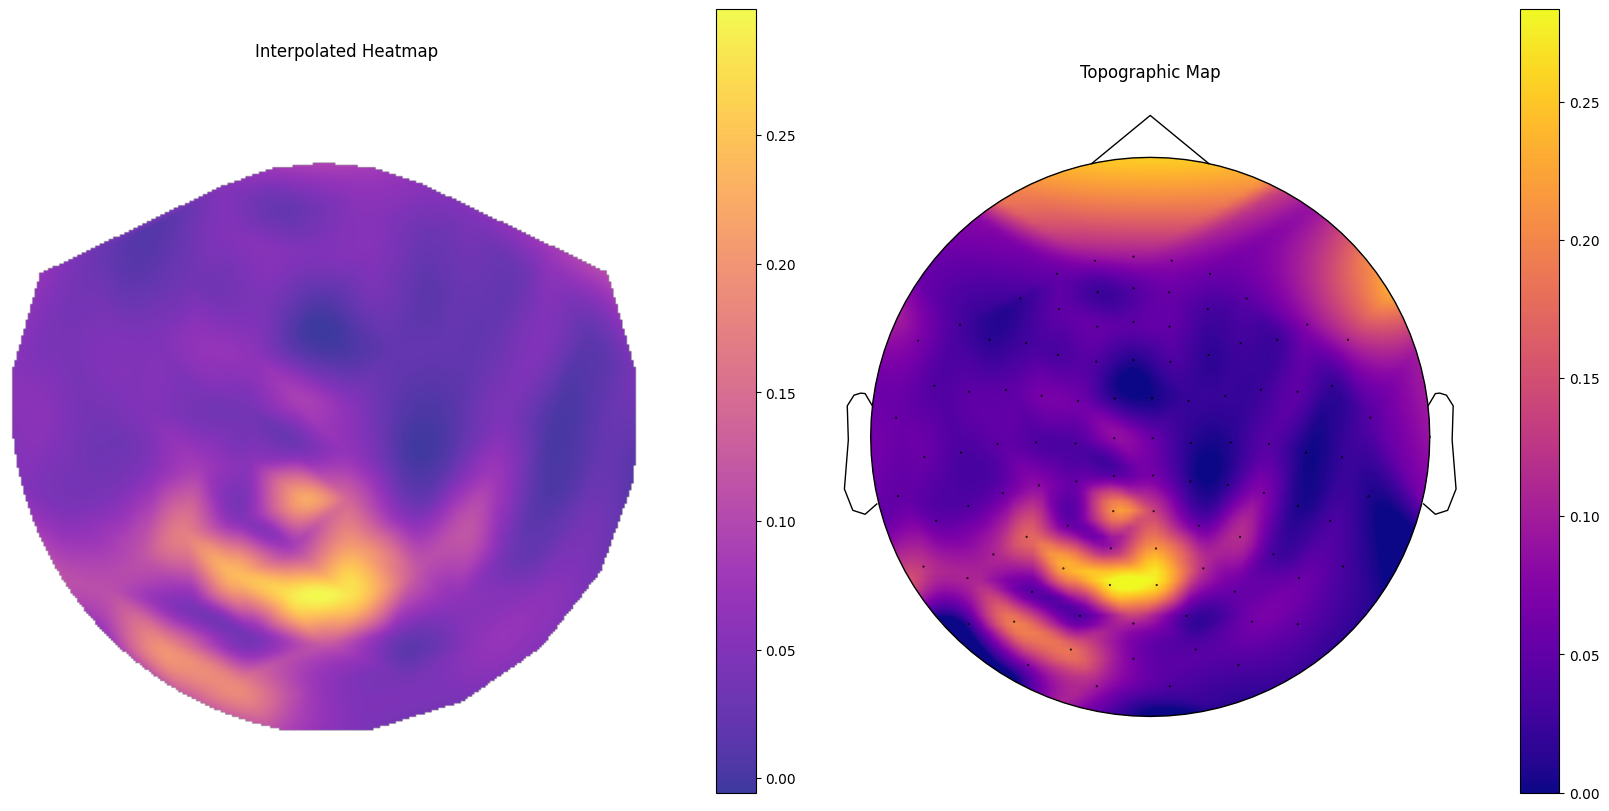

In [160]:
fig, axs, (im1, im2) = visualizer.plot_topomap_interpolated(
    titles=("Interpolated Heatmap", "Topographic Map")
)
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.savefig("../figures/cross-validated-results/linear/imagined-imagined-topomap_full.png", dpi=300)
plt.show()


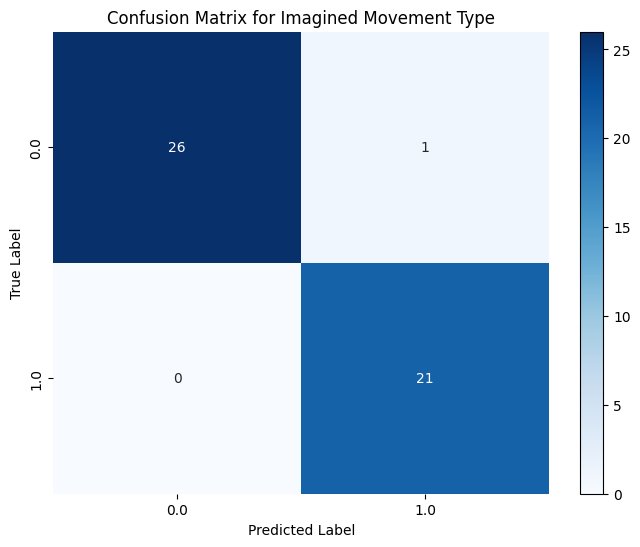

In [161]:
fig, ax = visualizer.plot_confusion_matrix(
    title="Confusion Matrix for Imagined Movement Type",
    cmap="Blues"
)
plt.colorbar(ax.collections[0], ax=ax)
plt.savefig("../figures/cross-validated-results/linear/imagined-imagined-confusion-matrix.png", dpi=300)
plt.show()


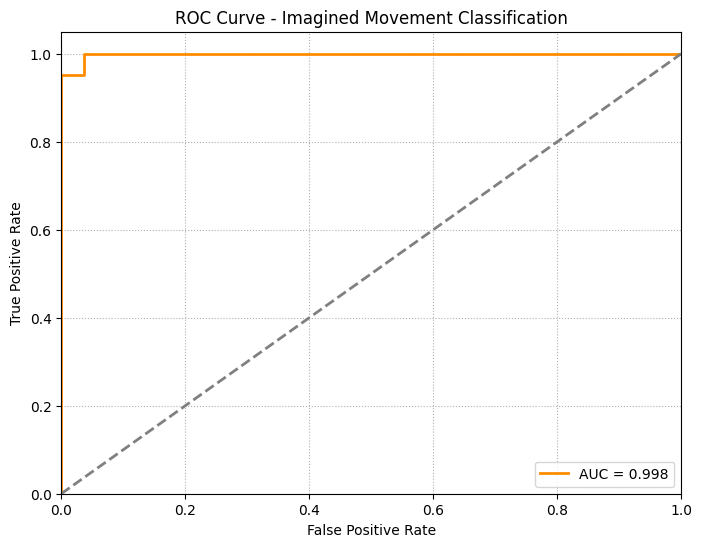

In [162]:
fig, ax = visualizer.plot_roc_curve(
    title="ROC Curve - Imagined Movement Classification"
)
plt.savefig("../figures/cross-validated-results/linear/imagined-imagined-roc-curve.png", dpi=300)
plt.show()


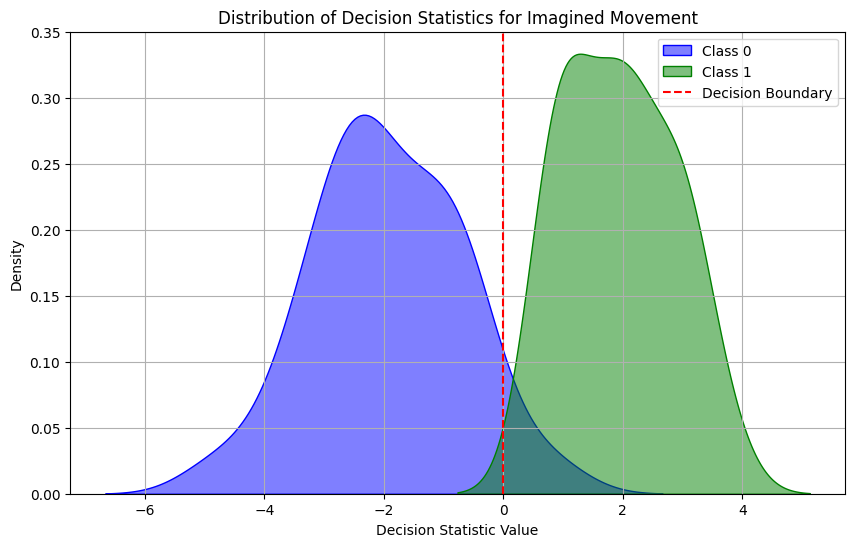

In [163]:
fig, ax = visualizer.plot_decision_statistic_kde(
    title="Distribution of Decision Statistics for Imagined Movement"
)
plt.savefig("../figures/cross-validated-results/linear/imagined-imagined-decision-statistic.png", dpi=300)
plt.show()


### RBF Kernel SVM

In [164]:
svm_cv_linear_OO = LinearSVMClassifierCV(alphas=alphas, kernel='rbf', verbose=True)
model, metrics, roc_info, best_alpha = svm_cv_linear_OO.train_and_evaluate_model(X_train_imag, y_train_imag, X_test_imag, y_test_imag)
print('Best alpha: ', best_alpha)

🔁 Outer CV:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Outer Fold 1: Best α = 0.5, Val Acc = 0.8688


🔁 Outer CV:  33%|███▎      | 2/6 [00:00<00:00, 15.70it/s]

✅ Outer Fold 2: Best α = 0.005, Val Acc = 0.8625


✅ Outer Fold 3: Best α = 0.5, Val Acc = 0.8625


🔁 Outer CV:  67%|██████▋   | 4/6 [00:00<00:00, 16.91it/s]

✅ Outer Fold 4: Best α = 0.01, Val Acc = 0.8938


✅ Outer Fold 5: Best α = 0.5, Val Acc = 0.8688


🔁 Outer CV: 100%|██████████| 6/6 [00:00<00:00, 13.11it/s]

✅ Outer Fold 6: Best α = 0.005, Val Acc = 0.8562
Best alpha:  0.2533333333333333


In [165]:
# predict the test set
y_pred_overt = model.predict(X_test_overt)
y_score_overt = model.decision_function(X_test_overt)

In [166]:
print("Accuracy:", accuracy_score(y_test_overt, y_pred_overt))
print("\nClassification Report:\n", classification_report(y_test_overt, y_pred_overt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_overt, y_pred_overt))
print("\nROC AUC Score:", roc_auc_score(y_test_overt, y_score_overt))

Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        27
         1.0       0.88      1.00      0.93        21

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.95      0.94      0.94        48


Confusion Matrix:
 [[24  3]
 [ 0 21]]

ROC AUC Score: 0.9858906525573192


In [167]:
visualizer = SVMModelVisualizer(
    model=model,
    X_test=X_test_overt,
    y_test=y_test_overt,
    electrode_path="../data/BCIsensor_xy.csv",
    kernel='rbf'
)

In [168]:
accuracy, auc, report = visualizer.report_metrics()

Accuracy: 0.9375
ROC AUC: 0.9858906525573192

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        27
         1.0       0.88      1.00      0.93        21

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.95      0.94      0.94        48



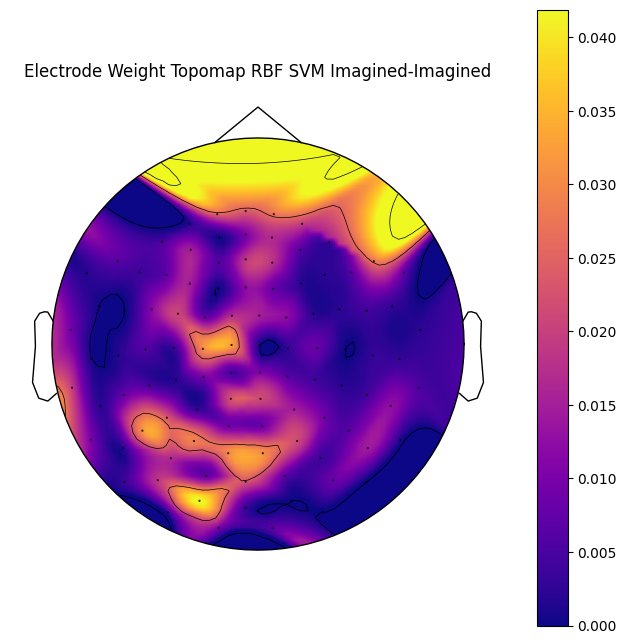

In [169]:
fig, ax, im = visualizer.plot_topomap(
    title="Electrode Weight Topomap RBF SVM Imagined-Imagined",
)
plt.colorbar(im, ax=ax)
plt.savefig("../figures/cross-validated-results/rbf/imaged-imaged-topomap.png", dpi=300)
plt.show()

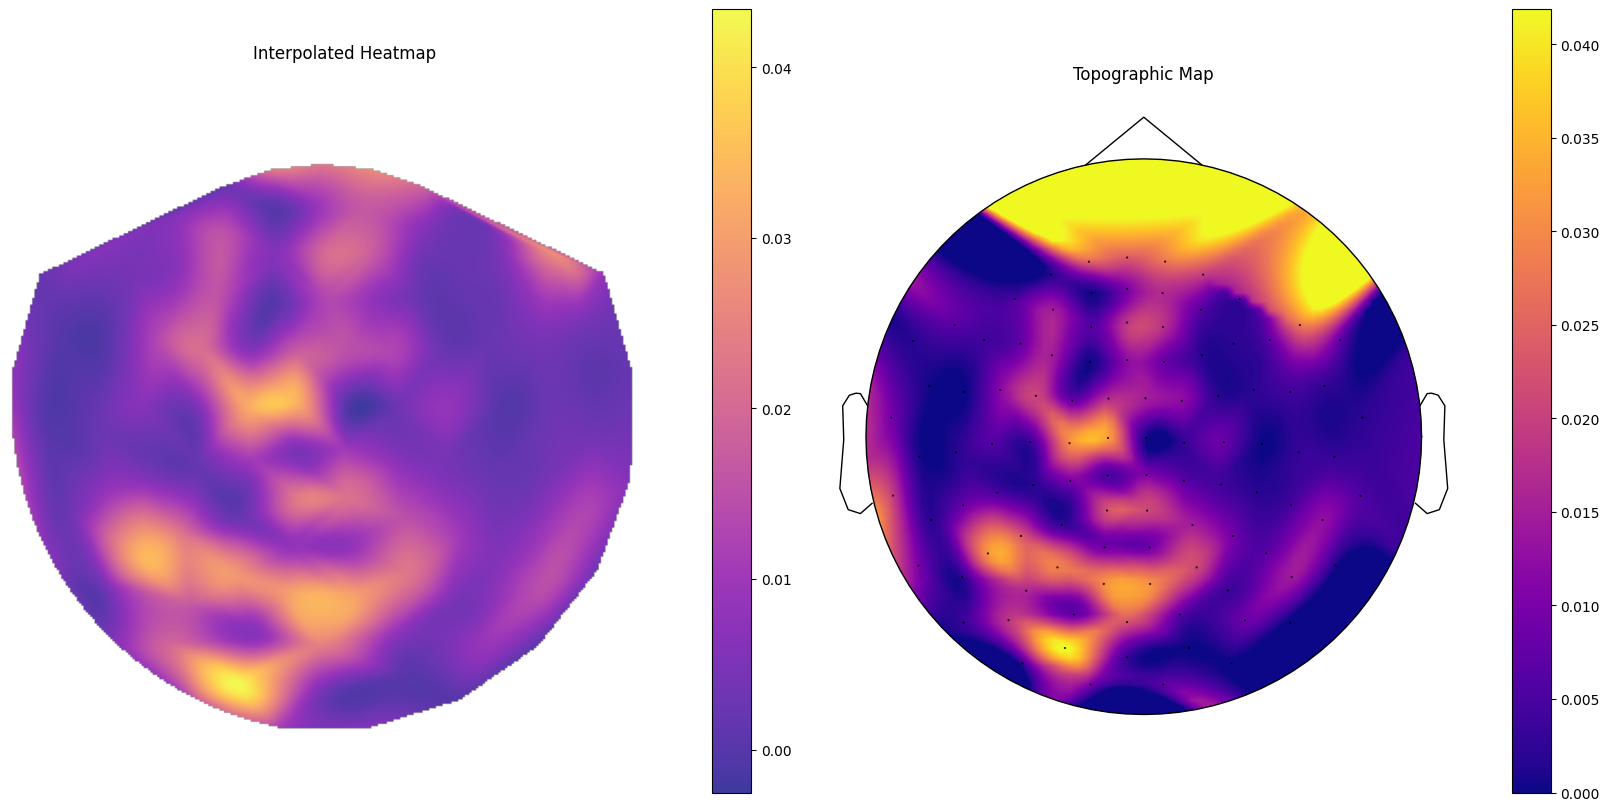

In [170]:
fig, axs, (im1, im2) = visualizer.plot_topomap_interpolated(
    titles=("Interpolated Heatmap", "Topographic Map")
)
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.savefig("../figures/cross-validated-results/rbf/imagined-imagined-topomap_full.png", dpi=300)
plt.show()


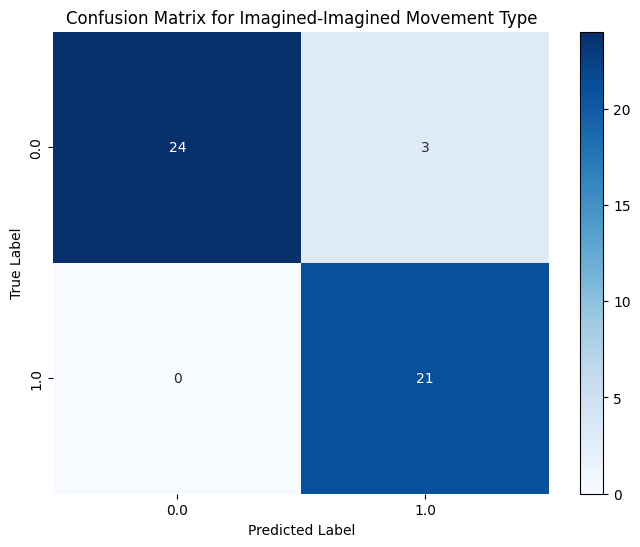

In [171]:
fig, ax = visualizer.plot_confusion_matrix(
    title="Confusion Matrix for Imagined-Imagined Movement Type",
    cmap="Blues"
)
plt.colorbar(ax.collections[0], ax=ax)
plt.savefig("../figures/cross-validated-results/rbf/imagined-imagined-confusion-matrix.png", dpi=300)
plt.show()


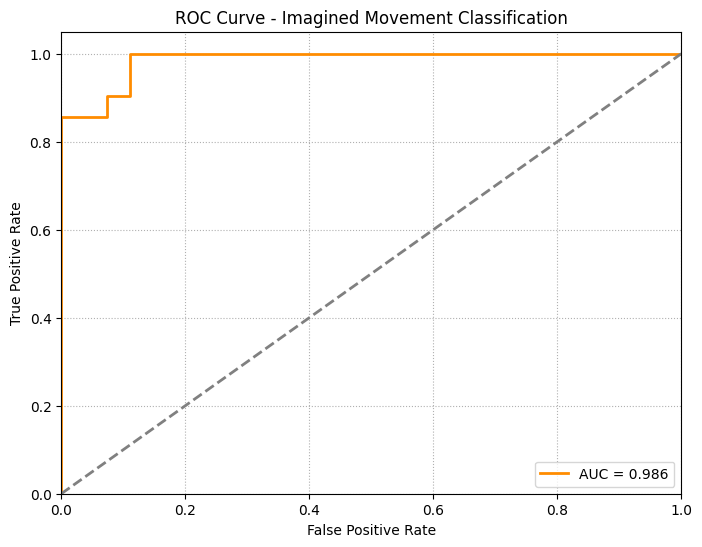

In [172]:
fig, ax = visualizer.plot_roc_curve(
    title="ROC Curve - Imagined Movement Classification"
)
plt.savefig("../figures/cross-validated-results/rbf/imagined-imagined-roc-curve.png", dpi=300)
plt.show()


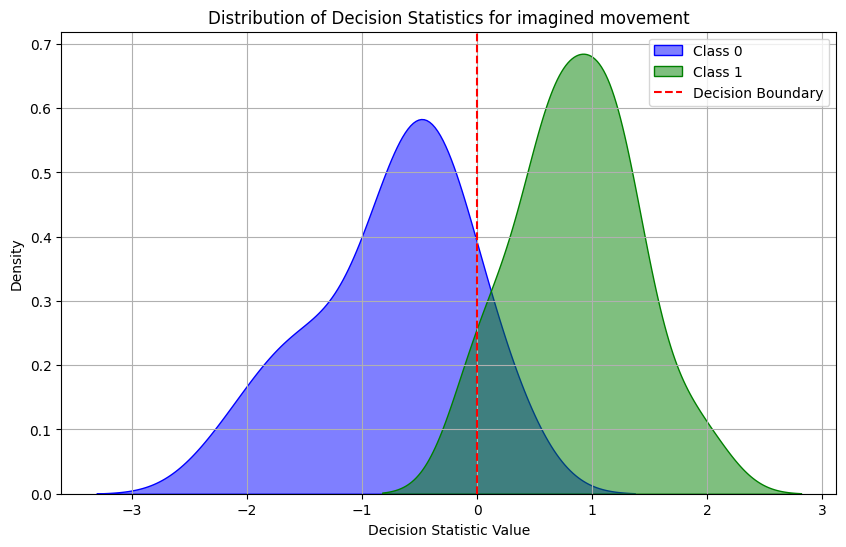

In [173]:
fig, ax = visualizer.plot_decision_statistic_kde(
    title="Distribution of Decision Statistics for imagined movement"
)
plt.savefig("../figures/cross-validated-results/rbf/imagined-imagined-decision-statistic.png", dpi=300)
plt.show()


### Poly Kernel SVM

In [174]:
svm_cv_linear_OO = LinearSVMClassifierCV(alphas=alphas, kernel='poly', verbose=True)
model, metrics, roc_info, best_alpha = svm_cv_linear_OO.train_and_evaluate_model(X_train_imag, y_train_imag, X_test_imag, y_test_imag)
print('Best alpha: ', best_alpha)

🔁 Outer CV:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Outer Fold 1: Best α = 0.05, Val Acc = 0.8000


🔁 Outer CV:  33%|███▎      | 2/6 [00:00<00:00, 18.12it/s]

✅ Outer Fold 2: Best α = 0.1, Val Acc = 0.8000


✅ Outer Fold 3: Best α = 0.1, Val Acc = 0.8125


✅ Outer Fold 4: Best α = 0.1, Val Acc = 0.8250


🔁 Outer CV:  83%|████████▎ | 5/6 [00:00<00:00, 18.91it/s]

✅ Outer Fold 5: Best α = 1, Val Acc = 0.8562


🔁 Outer CV: 100%|██████████| 6/6 [00:00<00:00, 17.00it/s]

✅ Outer Fold 6: Best α = 0.1, Val Acc = 0.8625


Best alpha:  0.2416666666666667


In [175]:
# predict the test set
y_pred_overt = model.predict(X_test_overt)
y_score_overt = model.decision_function(X_test_overt)

In [176]:
print("Accuracy:", accuracy_score(y_test_overt, y_pred_overt))
print("\nClassification Report:\n", classification_report(y_test_overt, y_pred_overt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_overt, y_pred_overt))
print("\nROC AUC Score:", roc_auc_score(y_test_overt, y_score_overt))

Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.81      0.88        27
         1.0       0.80      0.95      0.87        21

    accuracy                           0.88        48
   macro avg       0.88      0.88      0.87        48
weighted avg       0.89      0.88      0.88        48


Confusion Matrix:
 [[22  5]
 [ 1 20]]

ROC AUC Score: 0.9506172839506173


In [177]:
visualizer = SVMModelVisualizer(
    model=model,
    X_test=X_test_overt,
    y_test=y_test_overt,
    electrode_path="../data/BCIsensor_xy.csv",
    kernel='poly'
)

In [178]:
accuracy, auc, report = visualizer.report_metrics()

Accuracy: 0.875
ROC AUC: 0.9506172839506173

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.81      0.88        27
         1.0       0.80      0.95      0.87        21

    accuracy                           0.88        48
   macro avg       0.88      0.88      0.87        48
weighted avg       0.89      0.88      0.88        48



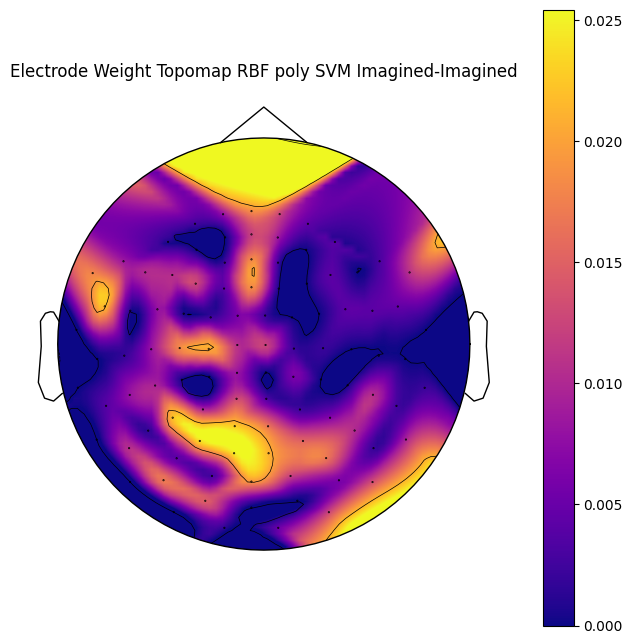

In [179]:
fig, ax, im = visualizer.plot_topomap(
    title="Electrode Weight Topomap RBF poly SVM Imagined-Imagined",
)
plt.colorbar(im, ax=ax)
plt.savefig("../figures/cross-validated-results/poly/imagined-imagined-topomap.png", dpi=300)
plt.show()

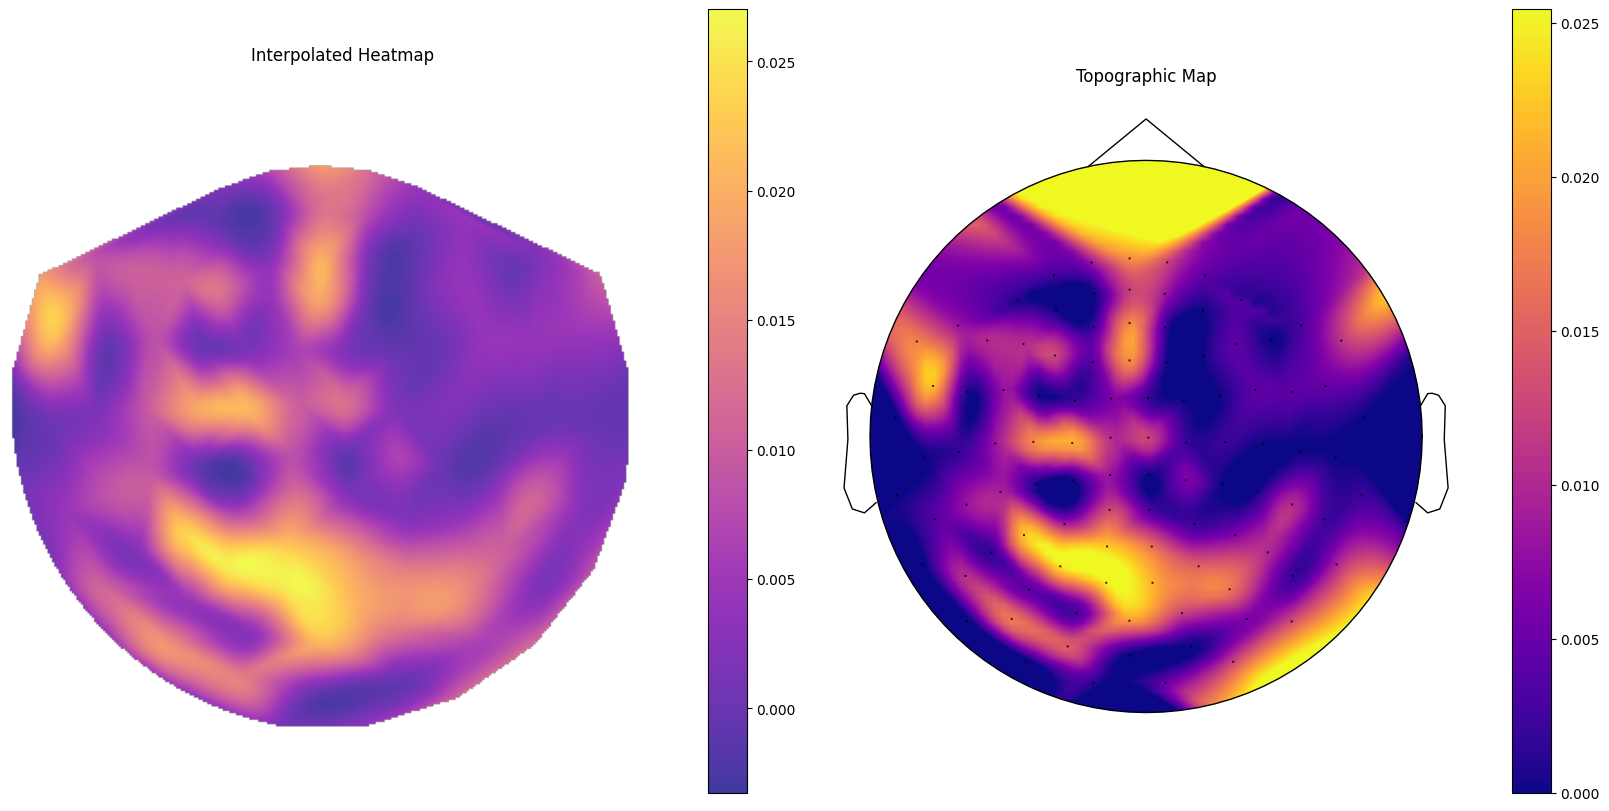

In [180]:
fig, axs, (im1, im2) = visualizer.plot_topomap_interpolated(
    titles=("Interpolated Heatmap", "Topographic Map")
)
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.savefig("../figures/cross-validated-results/poly/imagined-imagined-topomap_full.png", dpi=300)
plt.show()


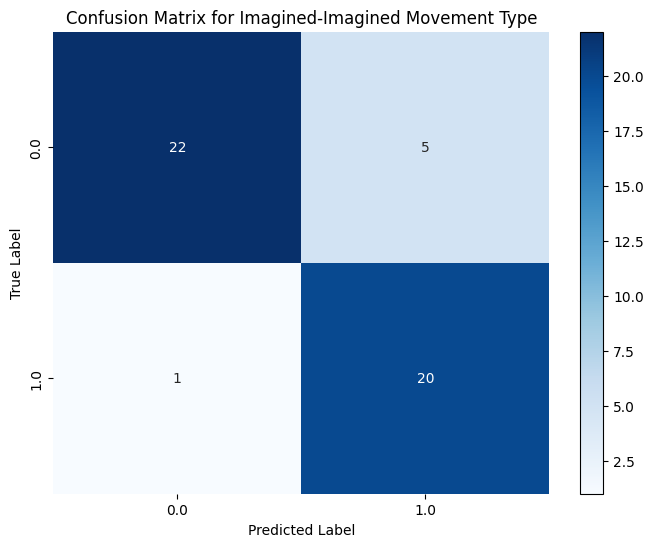

In [181]:
fig, ax = visualizer.plot_confusion_matrix(
    title="Confusion Matrix for Imagined-Imagined Movement Type",
    cmap="Blues"
)
plt.colorbar(ax.collections[0], ax=ax)
plt.savefig("../figures/cross-validated-results/poly/imagined-imagined-confusion-matrix.png", dpi=300)
plt.show()


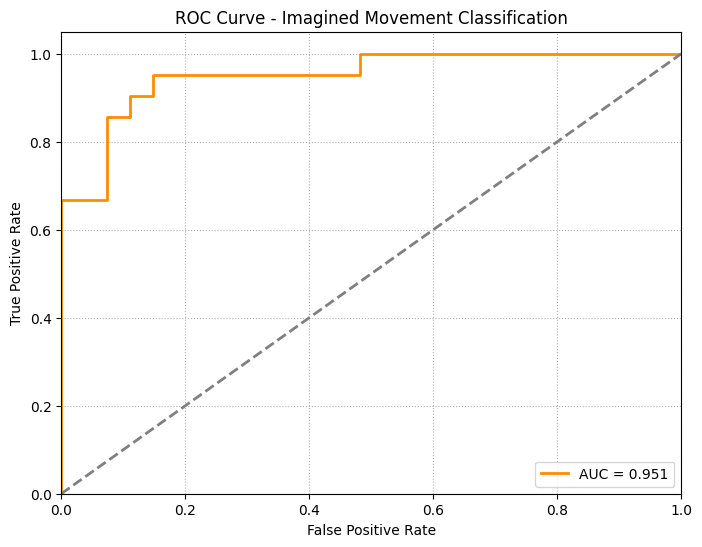

In [182]:
fig, ax = visualizer.plot_roc_curve(
    title="ROC Curve - Imagined Movement Classification"
)
plt.savefig("../figures/cross-validated-results/poly/imagined-imagined-roc-curve.png", dpi=300)
plt.show()


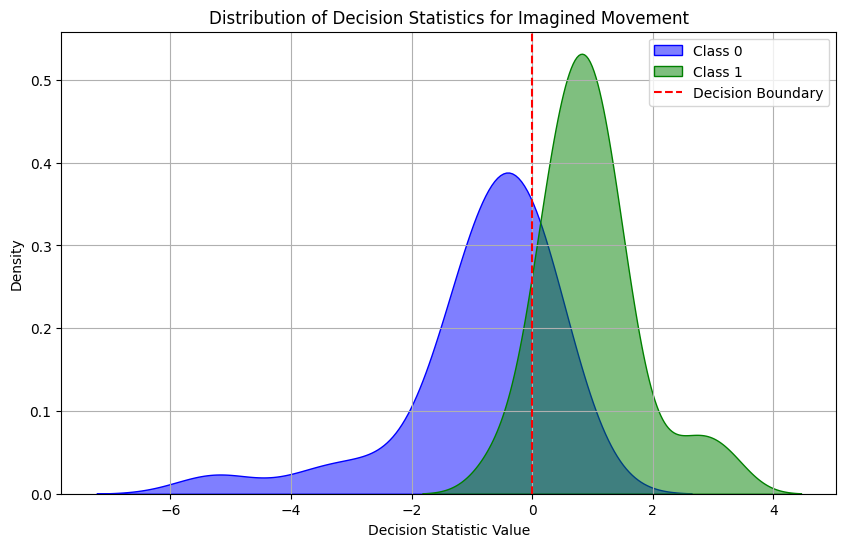

In [183]:
fig, ax = visualizer.plot_decision_statistic_kde(
    title="Distribution of Decision Statistics for Imagined Movement"
)
plt.savefig("../figures/cross-validated-results/poly/imagined-imagined-decision-statistic.png", dpi=300)
plt.show()


### Sigmoid Kernel SVM

In [184]:
svm_cv_linear_OO = LinearSVMClassifierCV(alphas=alphas, kernel='sigmoid', verbose=True)
model, metrics, roc_info, best_alpha = svm_cv_linear_OO.train_and_evaluate_model(X_train_imag, y_train_imag, X_test_imag, y_test_imag)
print('Best alpha: ', best_alpha)

🔁 Outer CV:  17%|█▋        | 1/6 [00:00<00:00,  5.86it/s]

✅ Outer Fold 1: Best α = 1, Val Acc = 0.8500


✅ Outer Fold 2: Best α = 0.5, Val Acc = 0.8938


🔁 Outer CV:  50%|█████     | 3/6 [00:00<00:00, 10.20it/s]

✅ Outer Fold 3: Best α = 1, Val Acc = 0.8562


✅ Outer Fold 4: Best α = 1, Val Acc = 0.8625


🔁 Outer CV:  83%|████████▎ | 5/6 [00:00<00:00, 13.15it/s]

✅ Outer Fold 5: Best α = 0.1, Val Acc = 0.8250


🔁 Outer CV: 100%|██████████| 6/6 [00:00<00:00, 12.54it/s]

✅ Outer Fold 6: Best α = 1, Val Acc = 0.8938
Best alpha:  0.7666666666666666


In [185]:
# predict the test set
y_pred_overt = model.predict(X_test_overt)
y_score_overt = model.decision_function(X_test_overt)

In [186]:
print("Accuracy:", accuracy_score(y_test_overt, y_pred_overt))
print("\nClassification Report:\n", classification_report(y_test_overt, y_pred_overt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_overt, y_pred_overt))
print("\nROC AUC Score:", roc_auc_score(y_test_overt, y_score_overt))

Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        27
         1.0       0.88      1.00      0.93        21

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.95      0.94      0.94        48


Confusion Matrix:
 [[24  3]
 [ 0 21]]

ROC AUC Score: 0.9788359788359788


In [187]:
visualizer = SVMModelVisualizer(
    model=model,
    X_test=X_test_overt,
    y_test=y_test_overt,
    electrode_path="../data/BCIsensor_xy.csv",
    kernel='sigmoid'
)

In [188]:
accuracy, auc, report = visualizer.report_metrics()

Accuracy: 0.9375
ROC AUC: 0.9788359788359788

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        27
         1.0       0.88      1.00      0.93        21

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.95      0.94      0.94        48



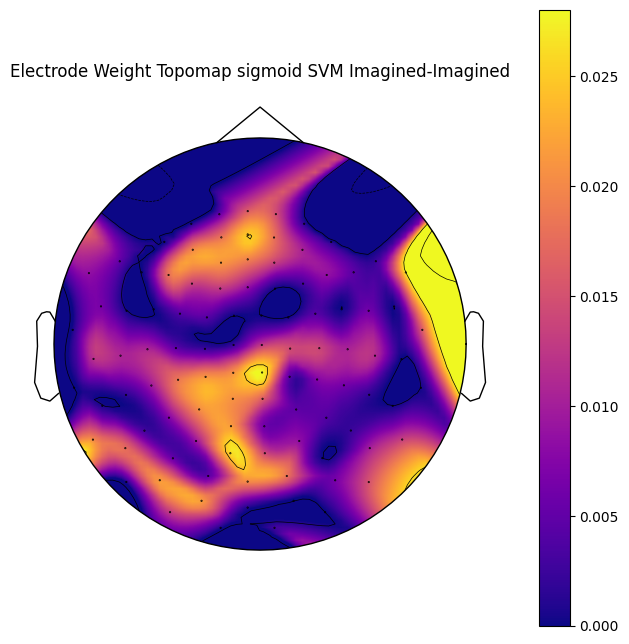

In [189]:
fig, ax, im = visualizer.plot_topomap(
    title="Electrode Weight Topomap sigmoid SVM Imagined-Imagined",
)
plt.colorbar(im, ax=ax)
plt.savefig("../figures/cross-validated-results/sigmoid/imagined-imagined-topomap.png", dpi=300)
plt.show()

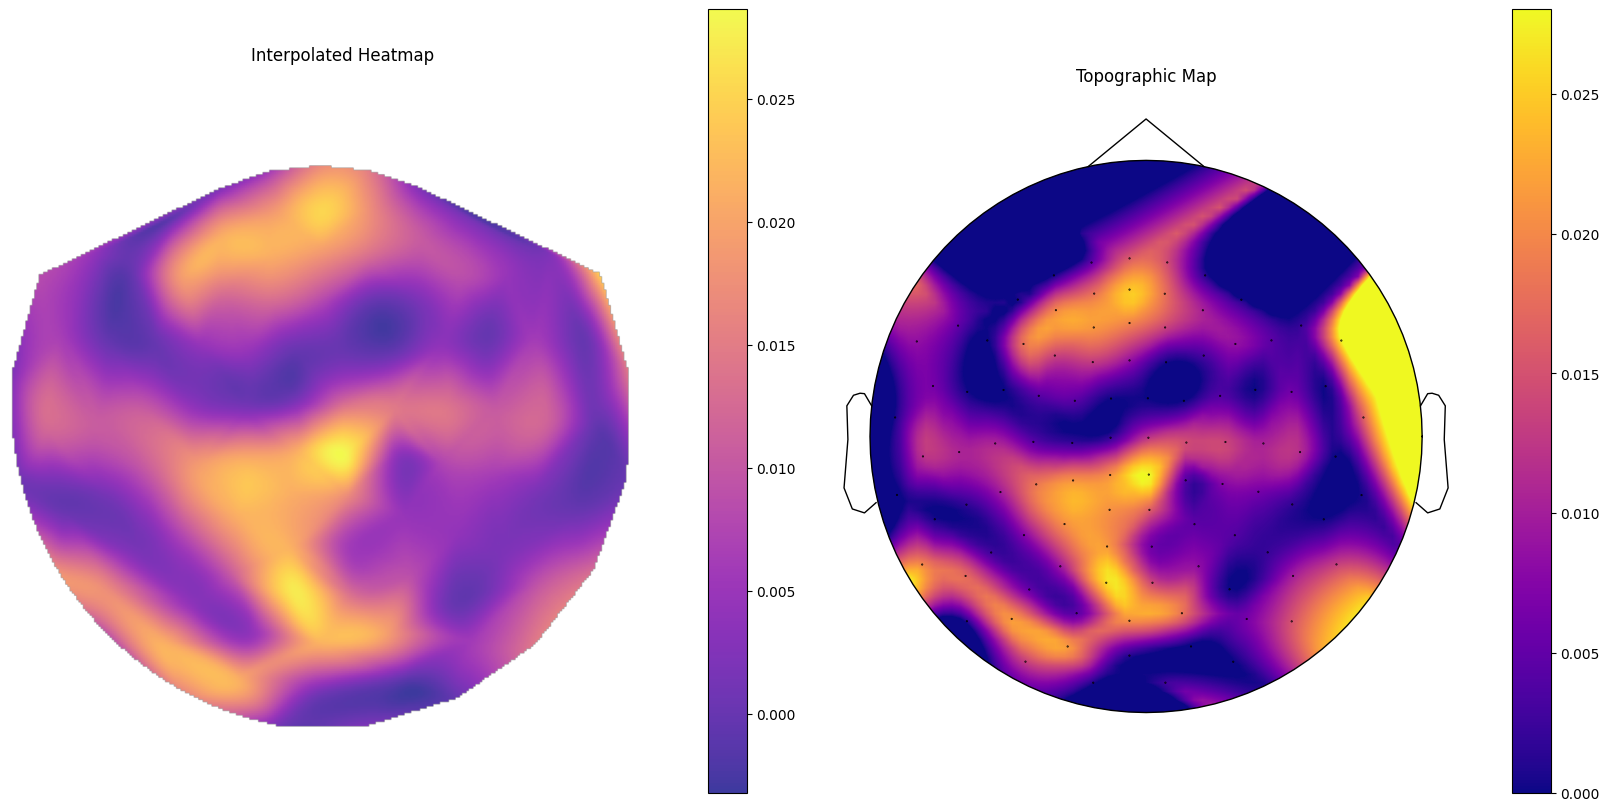

In [190]:
fig, axs, (im1, im2) = visualizer.plot_topomap_interpolated(
    titles=("Interpolated Heatmap", "Topographic Map")
)
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.savefig("../figures/cross-validated-results/sigmoid/imagined-imagined-topomap_full.png", dpi=300)
plt.show()


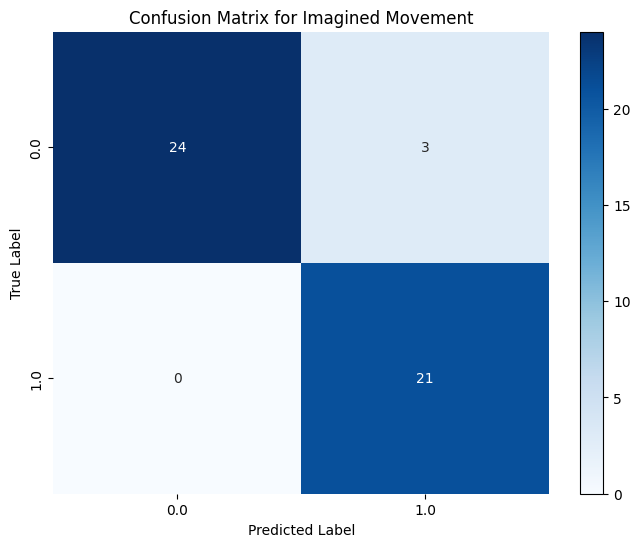

In [191]:
fig, ax = visualizer.plot_confusion_matrix(
    title="Confusion Matrix for Imagined Movement",
    cmap="Blues"
)
plt.colorbar(ax.collections[0], ax=ax)
plt.savefig("../figures/cross-validated-results/sigmoid/imagined-imagined-confusion-matrix.png", dpi=300)
plt.show()


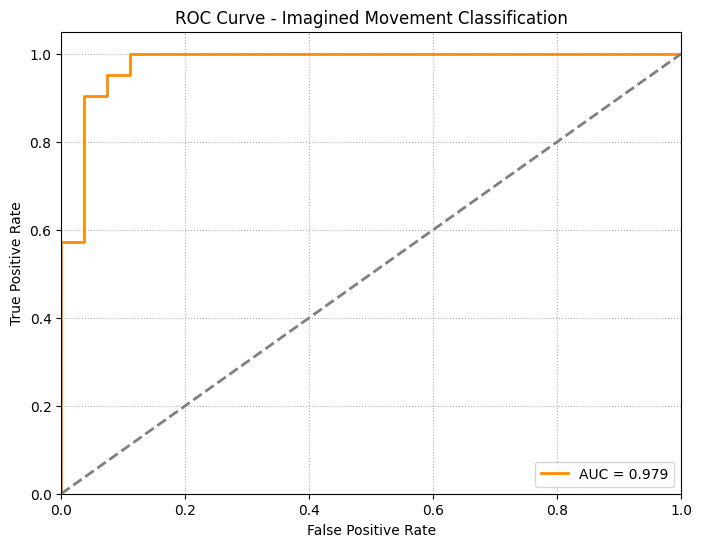

In [192]:
fig, ax = visualizer.plot_roc_curve(
    title="ROC Curve - Imagined Movement Classification",
)
plt.savefig("../figures/cross-validated-results/sigmoid/imagined-imagined-roc-curve.png", dpi=300)
plt.show()


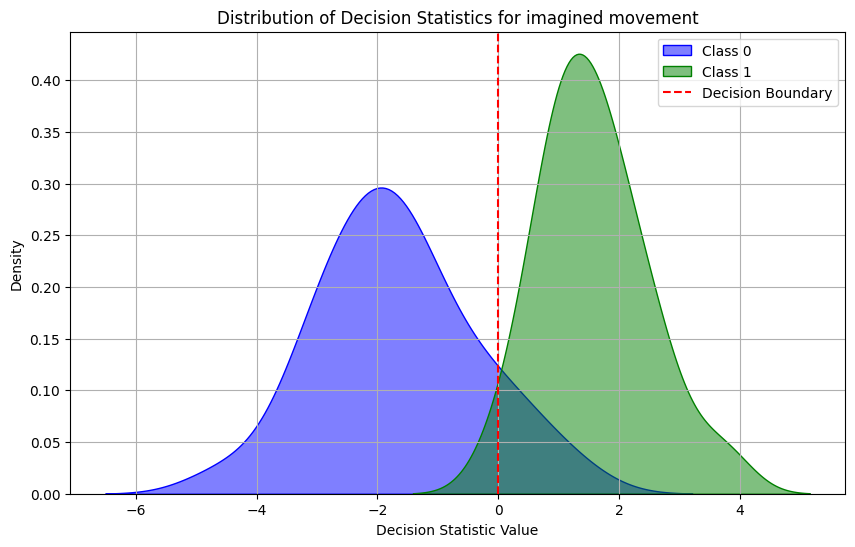

In [193]:
fig, ax = visualizer.plot_decision_statistic_kde(
    title="Distribution of Decision Statistics for imagined movement",
)
plt.savefig("../figures/cross-validated-results/sigmoid/imagined-imagined-decision-statistic.png", dpi=300)
plt.show()


## Overt-Imagined

### Linear Kernel SVM

In [194]:
svm_cv_linear_OI = LinearSVMClassifierCV(alphas=alphas, kernel='linear', verbose=True)
model, metrics, roc_info, best_alpha = svm_cv_linear_OI.train_and_evaluate_model(X_train_overt, y_train_overt, X_test_imag, y_test_imag)
print('Best alpha: ', best_alpha)

🔁 Outer CV:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Outer Fold 1: Best α = 0.01, Val Acc = 0.9625


✅ Outer Fold 2: Best α = 0.1, Val Acc = 0.9625


🔁 Outer CV:  50%|█████     | 3/6 [00:00<00:00, 22.98it/s]

✅ Outer Fold 3: Best α = 1, Val Acc = 0.9625


✅ Outer Fold 4: Best α = 0.001, Val Acc = 0.9563


✅ Outer Fold 5: Best α = 1, Val Acc = 0.9812


🔁 Outer CV: 100%|██████████| 6/6 [00:00<00:00, 23.48it/s]

✅ Outer Fold 6: Best α = 0.5, Val Acc = 0.9688
Best alpha:  0.43516666666666665


In [195]:
# predict the test set
y_pred_overt = model.predict(X_test_overt)
y_score_overt = model.decision_function(X_test_overt)

In [196]:
print("Accuracy:", accuracy_score(y_test_overt, y_pred_overt))
print("\nClassification Report:\n", classification_report(y_test_overt, y_pred_overt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_overt, y_pred_overt))
print("\nROC AUC Score:", roc_auc_score(y_test_overt, y_score_overt))

Accuracy: 0.9791666666666666

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        27
         1.0       0.95      1.00      0.98        21

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48


Confusion Matrix:
 [[26  1]
 [ 0 21]]

ROC AUC Score: 1.0


In [197]:
visualizer = SVMModelVisualizer(
    model=model,
    X_test=X_test_overt,
    y_test=y_test_overt,
    electrode_path="../data/BCIsensor_xy.csv",
    kernel='linear'
)

In [198]:
accuracy, auc, report = visualizer.report_metrics()

Accuracy: 0.9791666666666666
ROC AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        27
         1.0       0.95      1.00      0.98        21

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



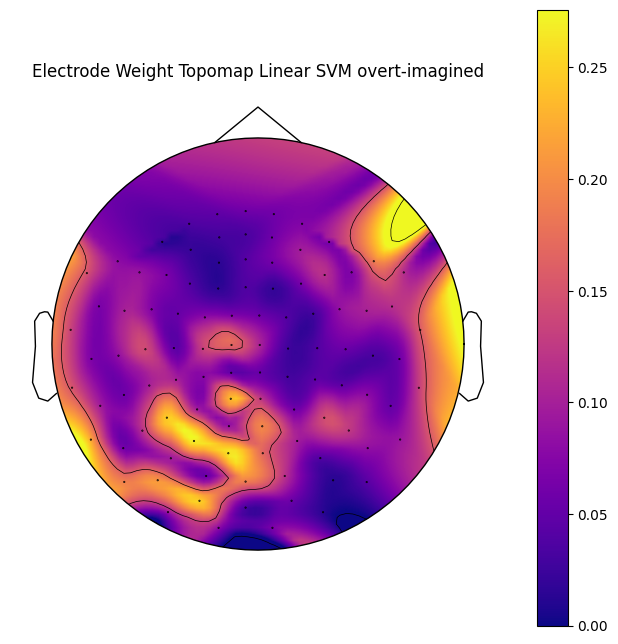

In [199]:
fig, ax, im = visualizer.plot_topomap(
    title="Electrode Weight Topomap Linear SVM overt-imagined",
)
plt.colorbar(im, ax=ax)
plt.savefig("../figures/cross-validated-results/linear/overt-imagined-topomap.png", dpi=300)
plt.show()

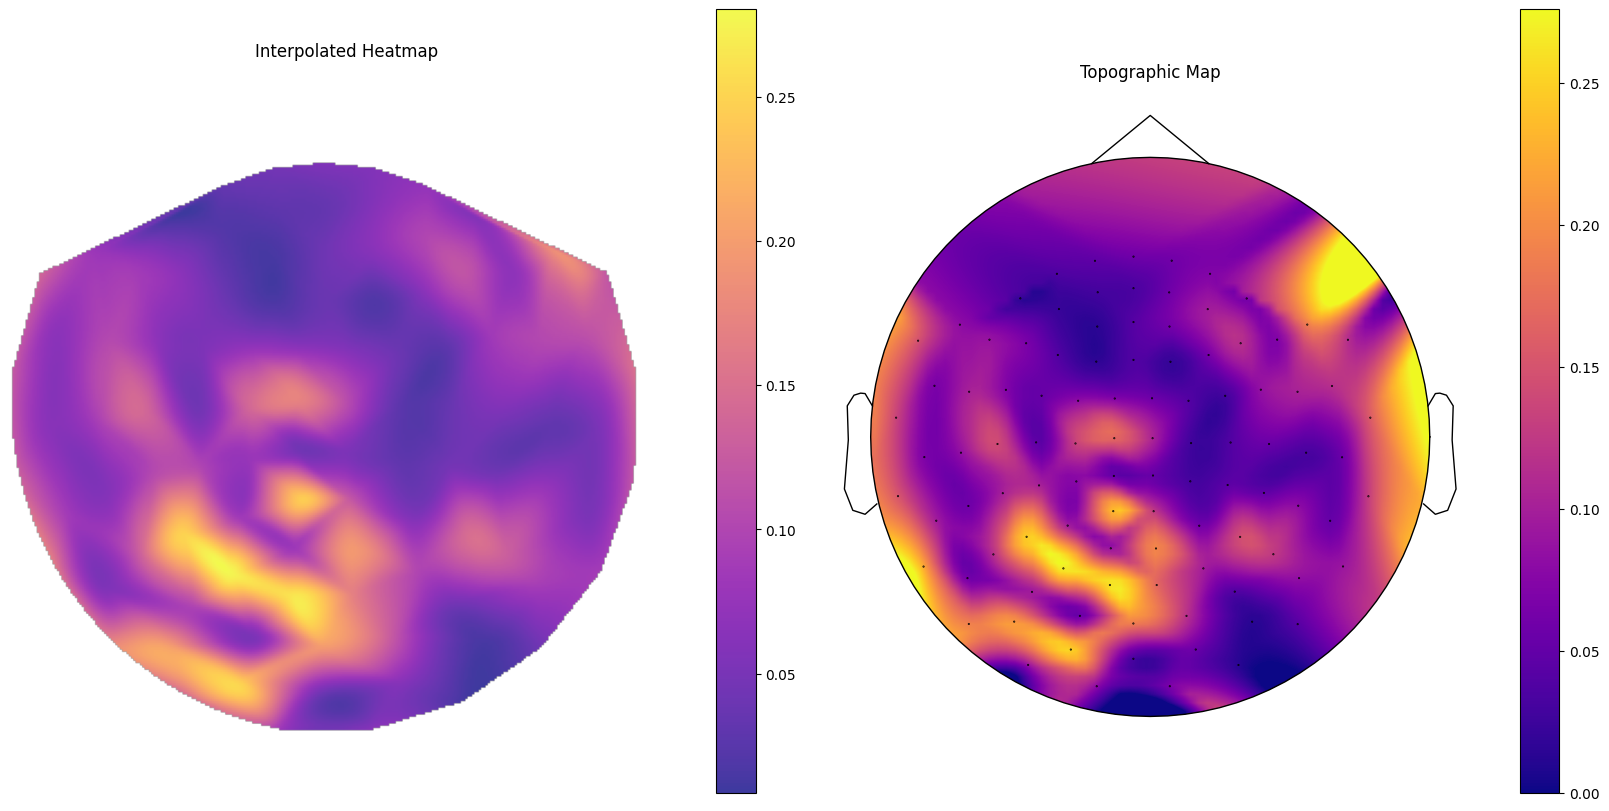

In [200]:
fig, axs, (im1, im2) = visualizer.plot_topomap_interpolated(
    titles=("Interpolated Heatmap", "Topographic Map")
)
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.savefig("../figures/cross-validated-results/linear/overt-imagined-topomap_full.png", dpi=300)
plt.show()


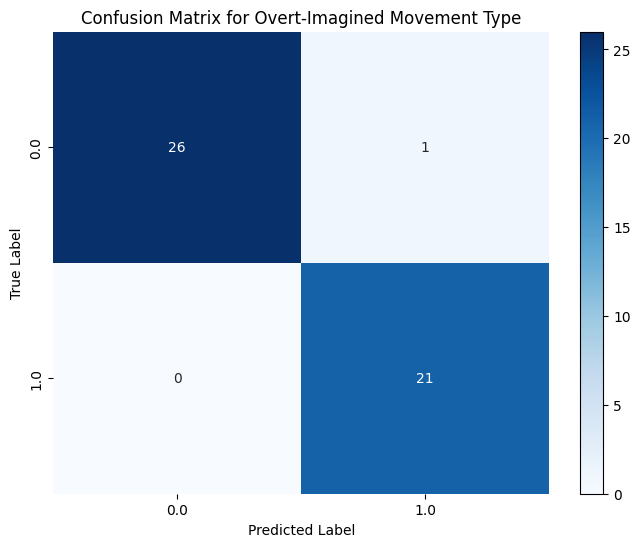

In [201]:
fig, ax = visualizer.plot_confusion_matrix(
    title="Confusion Matrix for Overt-Imagined Movement Type",
    cmap="Blues"
)
plt.colorbar(ax.collections[0], ax=ax)
plt.savefig("../figures/cross-validated-results/linear/overt-imagined-confusion-matrix.png", dpi=300)
plt.show()


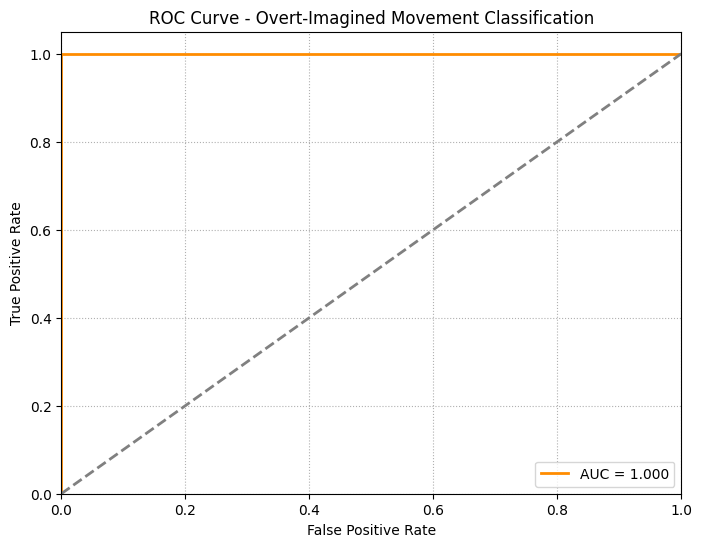

In [202]:
fig, ax = visualizer.plot_roc_curve(
    title="ROC Curve - Overt-Imagined Movement Classification"
)
plt.savefig("../figures/cross-validated-results/linear/overt-imagined-roc-curve.png", dpi=300)
plt.show()


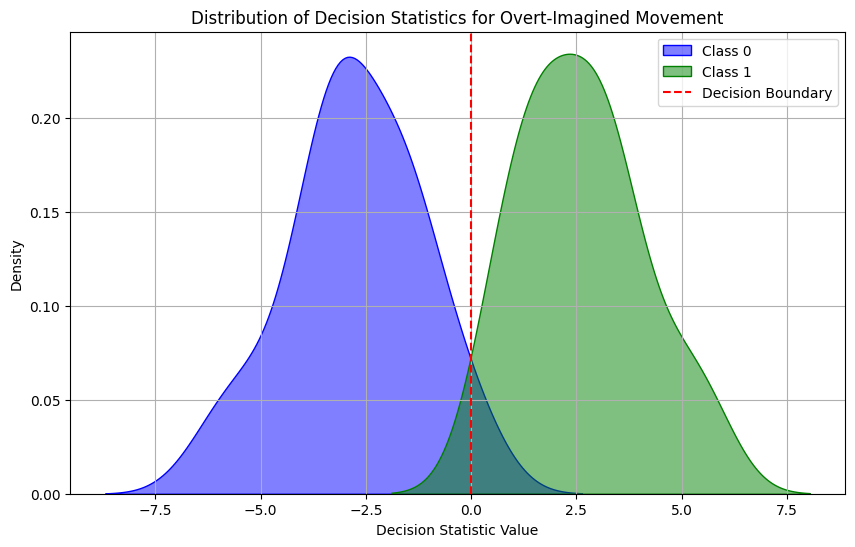

In [203]:
fig, ax = visualizer.plot_decision_statistic_kde(
    title="Distribution of Decision Statistics for Overt-Imagined Movement"
)
plt.savefig("../figures/cross-validated-results/linear/overt-imagined-decision-statistic.png", dpi=300)
plt.show()


## Imagined-Overt

### Linear Kernel SVM

In [204]:
svm_cv_linear_IO = LinearSVMClassifierCV(alphas=alphas, kernel='linear', verbose=True)
model, metrics, roc_info, best_alpha = svm_cv_linear_IO.train_and_evaluate_model(X_train_imag, y_train_imag, X_test_overt, y_test_overt)
print('Best alpha: ', best_alpha)

🔁 Outer CV:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Outer Fold 1: Best α = 0.005, Val Acc = 0.8812


✅ Outer Fold 2: Best α = 0.001, Val Acc = 0.8812


🔁 Outer CV:  50%|█████     | 3/6 [00:00<00:00, 22.17it/s]

✅ Outer Fold 3: Best α = 0.5, Val Acc = 0.9125


✅ Outer Fold 4: Best α = 5, Val Acc = 0.9000


✅ Outer Fold 5: Best α = 10, Val Acc = 0.9250


🔁 Outer CV: 100%|██████████| 6/6 [00:00<00:00, 23.42it/s]

✅ Outer Fold 6: Best α = 1, Val Acc = 0.8938


Best alpha:  2.751


In [205]:
# predict the test set
y_pred_overt = model.predict(X_test_overt)
y_score_overt = model.decision_function(X_test_overt)

In [206]:
print("Accuracy:", accuracy_score(y_test_overt, y_pred_overt))
print("\nClassification Report:\n", classification_report(y_test_overt, y_pred_overt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_overt, y_pred_overt))
print("\nROC AUC Score:", roc_auc_score(y_test_overt, y_score_overt))

Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        27
         1.0       0.91      1.00      0.95        21

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48


Confusion Matrix:
 [[25  2]
 [ 0 21]]

ROC AUC Score: 1.0


In [207]:
visualizer = SVMModelVisualizer(
    model=model,
    X_test=X_test_overt,
    y_test=y_test_overt,
    electrode_path="../data/BCIsensor_xy.csv",
    kernel='linear'
)

In [208]:
accuracy, auc, report = visualizer.report_metrics()

Accuracy: 0.9583333333333334
ROC AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        27
         1.0       0.91      1.00      0.95        21

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



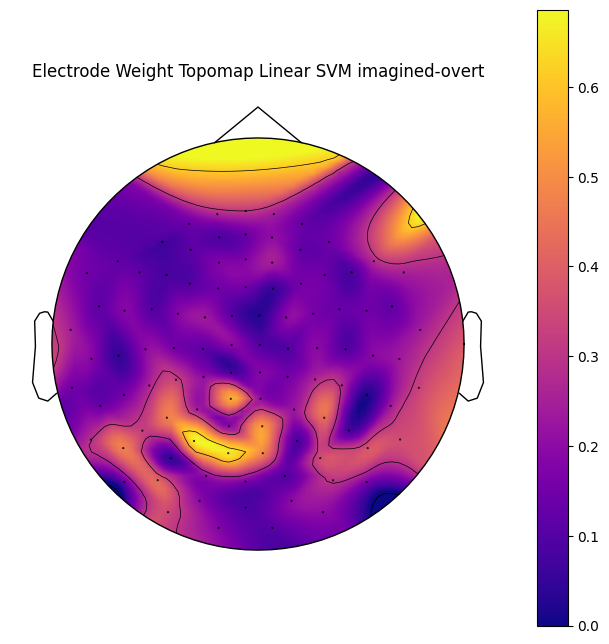

In [209]:
fig, ax, im = visualizer.plot_topomap(
    title="Electrode Weight Topomap Linear SVM imagined-overt",
)
plt.colorbar(im, ax=ax)
plt.savefig("../figures/cross-validated-results/linear/imagined-overt-topomap.png", dpi=300)
plt.show()

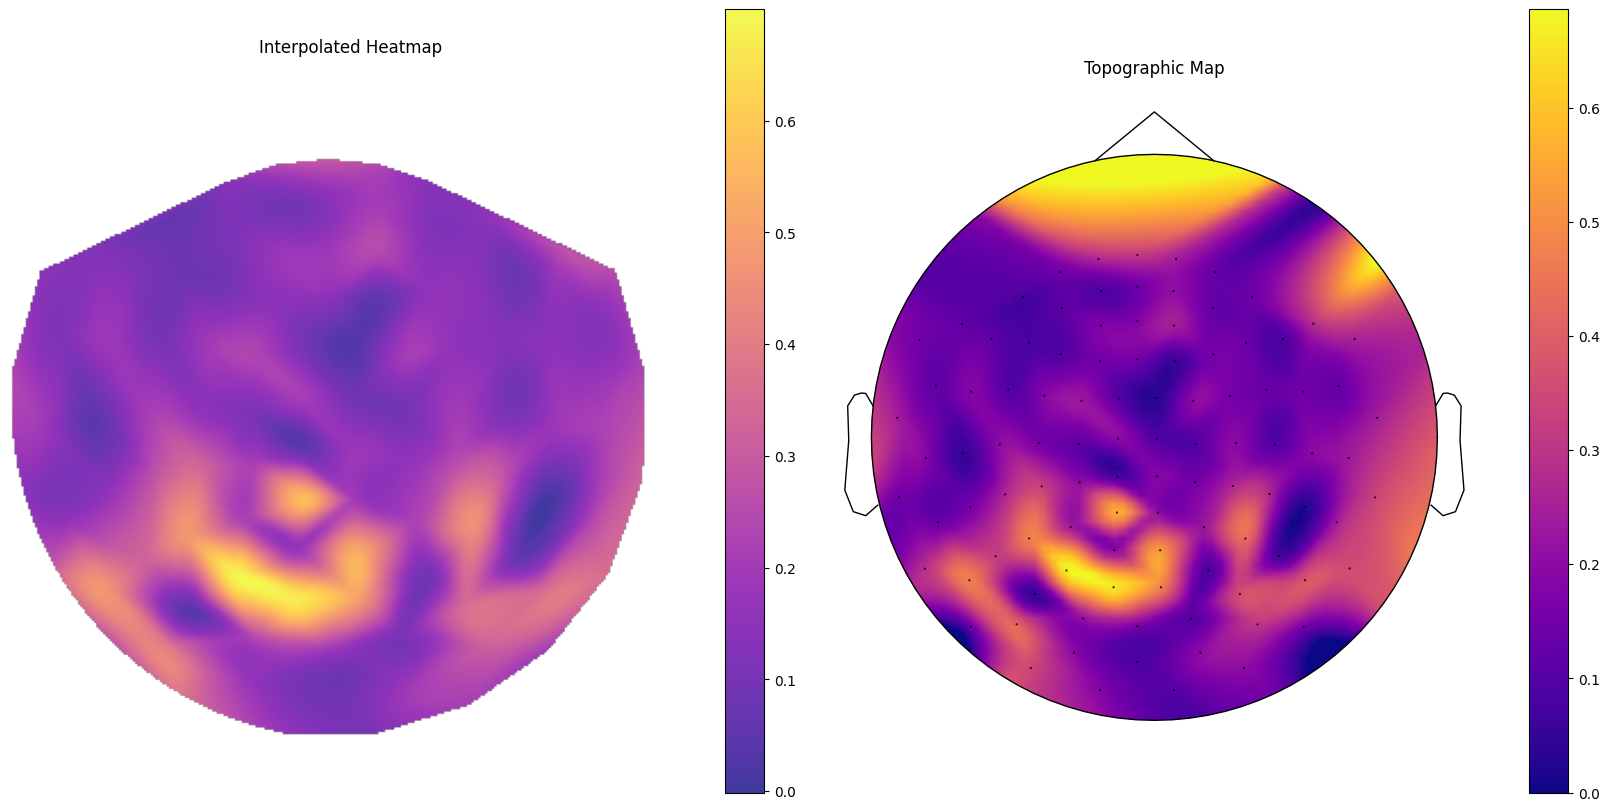

In [210]:
fig, axs, (im1, im2) = visualizer.plot_topomap_interpolated(
    titles=("Interpolated Heatmap", "Topographic Map")
)
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.savefig("../figures/cross-validated-results/linear/imagined-overt-topomap_full.png", dpi=300)
plt.show()


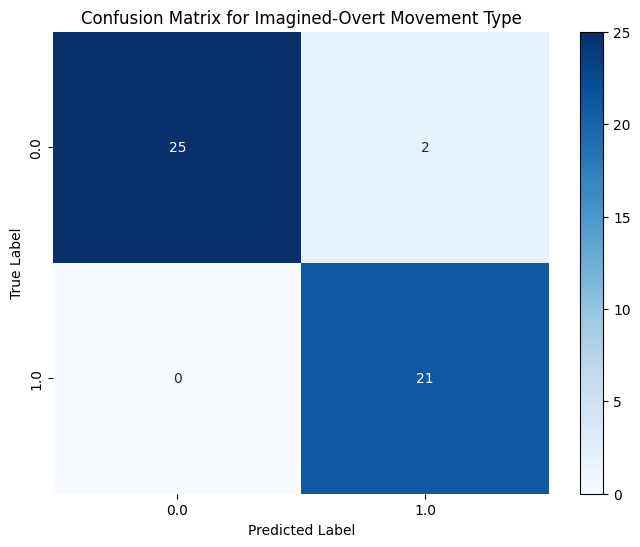

In [211]:
fig, ax = visualizer.plot_confusion_matrix(
    title="Confusion Matrix for Imagined-Overt Movement Type",
    cmap="Blues"
)
plt.colorbar(ax.collections[0], ax=ax)
plt.savefig("../figures/cross-validated-results/linear/imagined-overt-confusion-matrix.png", dpi=300)
plt.show()


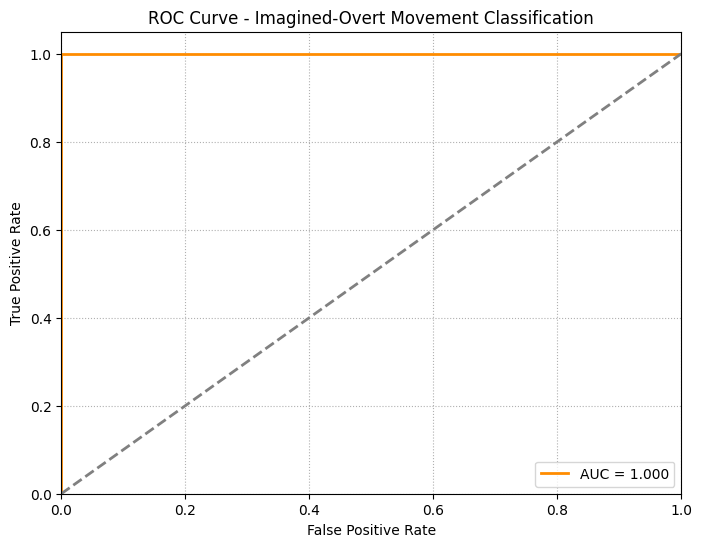

In [212]:
fig, ax = visualizer.plot_roc_curve(
    title="ROC Curve - Imagined-Overt Movement Classification"
)
plt.savefig("../figures/cross-validated-results/linear/imagined-overt-roc-curve.png", dpi=300)
plt.show()


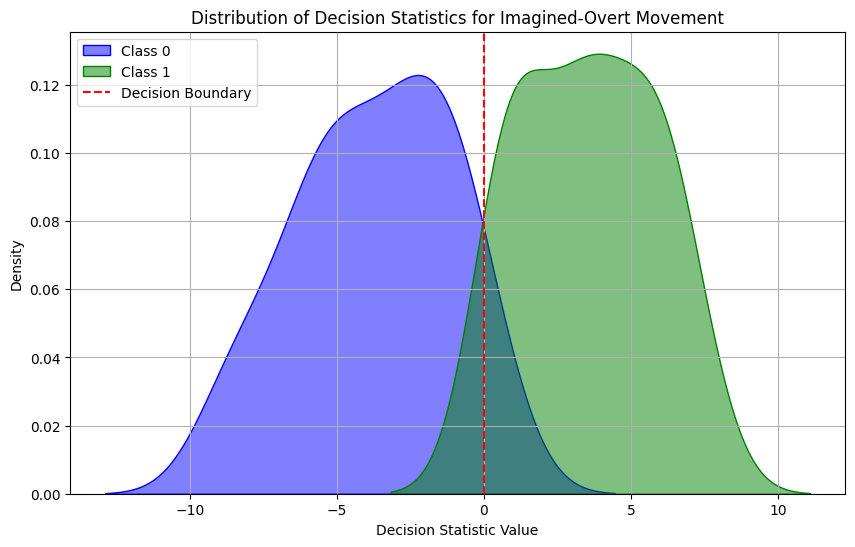

In [213]:
fig, ax = visualizer.plot_decision_statistic_kde(
    title="Distribution of Decision Statistics for Imagined-Overt Movement"
)
plt.savefig("../figures/cross-validated-results/linear/imagined-overt-decision-statistic.png", dpi=300)
plt.show()


# Comparison of training and test scenarios

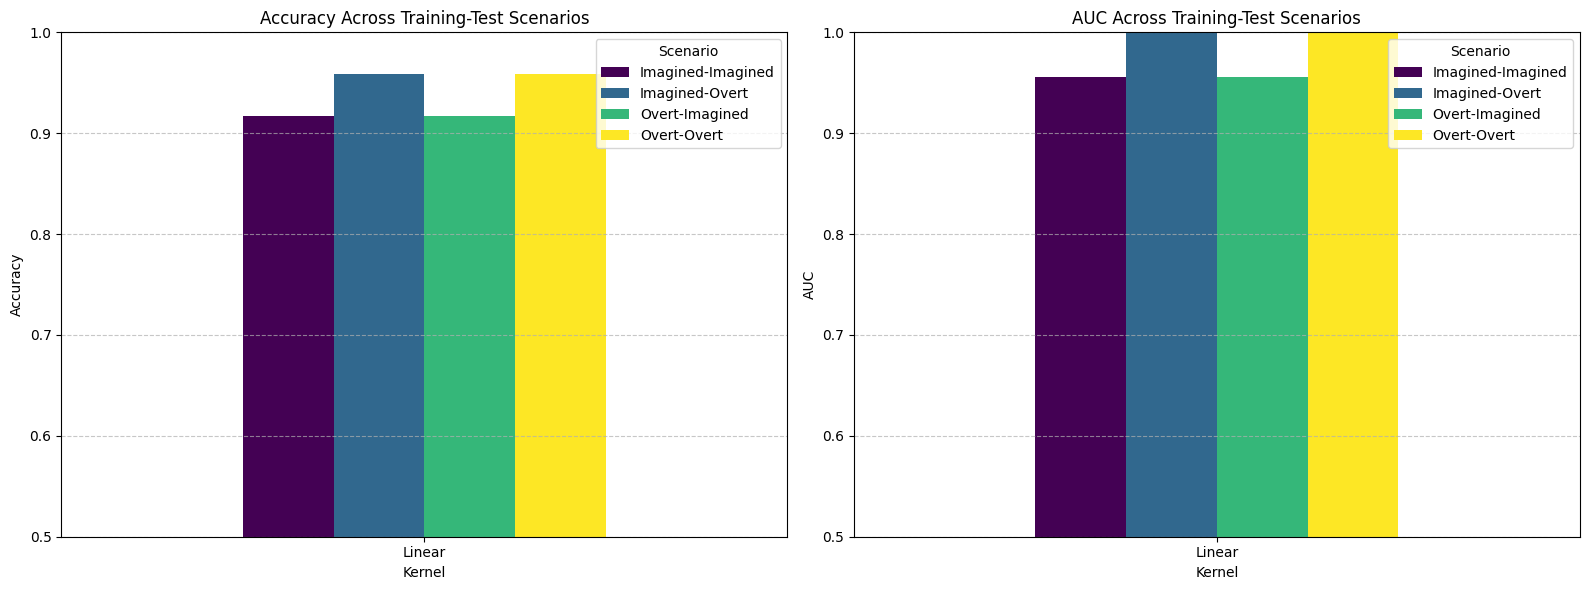

Performance Metrics Across Different Scenarios:

            Scenario  Kernel  Accuracy       AUC
0        Overt-Overt  Linear  0.958333  1.000000
1  Imagined-Imagined  Linear  0.916667  0.955357
2     Overt-Imagined  Linear  0.916667  0.955357
3     Imagined-Overt  Linear  0.958333  1.000000

Average Performance by Scenario:

                   Accuracy       AUC
Scenario                             
Imagined-Imagined  0.916667  0.955357
Imagined-Overt     0.958333  1.000000
Overt-Imagined     0.916667  0.955357
Overt-Overt        0.958333  1.000000


In [214]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score

import matplotlib.pyplot as plt

# Create a dictionary to store accuracy and AUC values for different models and kernels
results = {
    'Scenario': [],
    'Kernel': [],
    'Accuracy': [],
    'AUC': []
}

# Function to add model results to our results dictionary
def add_model_results(scenario, kernel, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_score = model.decision_function(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_score)
    
    results['Scenario'].append(scenario)
    results['Kernel'].append(kernel)
    results['Accuracy'].append(accuracy)
    results['AUC'].append(auc)

# Extract results from previously run models
# Overt-Overt
svm_cv_linear_OO.kernel = 'linear'  # Setting kernel based on cell 31
add_model_results('Overt-Overt', 'Linear', model, X_test_overt, y_test_overt)

# Imagined-Imagined
add_model_results('Imagined-Imagined', 'Linear', model, X_test_imag, y_test_imag)

# Overt-Imagined
add_model_results('Overt-Imagined', 'Linear', model, X_test_imag, y_test_imag)

# Imagined-Overt
add_model_results('Imagined-Overt', 'Linear', model, X_test_overt, y_test_overt)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot accuracies
df_results.pivot(index='Kernel', columns='Scenario', values='Accuracy').plot(
    kind='bar', 
    ax=ax[0], 
    rot=0,
    colormap='viridis'
)
ax[0].set_title('Accuracy Across Training-Test Scenarios')
ax[0].set_ylim([0.5, 1.0])  # Set y-axis range to better see differences
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].set_ylabel('Accuracy')

# Plot AUC values
df_results.pivot(index='Kernel', columns='Scenario', values='AUC').plot(
    kind='bar', 
    ax=ax[1], 
    rot=0,
    colormap='viridis'
)
ax[1].set_title('AUC Across Training-Test Scenarios')
ax[1].set_ylim([0.5, 1.0])  # Set y-axis range to better see differences
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].set_ylabel('AUC')

plt.tight_layout()
plt.savefig("../figures/cross-validated-results/scenario_comparison.png", dpi=300)
plt.show()

# Print a table with the results
print("Performance Metrics Across Different Scenarios:\n")
print(df_results)

# Calculate average performance for each scenario
avg_by_scenario = df_results.groupby('Scenario')[['Accuracy', 'AUC']].mean()
print("\nAverage Performance by Scenario:\n")
print(avg_by_scenario)